## Gun_violence_data



In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize

Importing the dataset

In [2]:
gun_data = pd.read_csv('Gun_violence_data.csv',dtype=str)

In [3]:
gun_data

,incident_id,date,day,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,...,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district,critical
0,461105,01-Jan-13,Tuesday,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN,FALSE
1,460726,01-Jan-13,Tuesday,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62,35,FALSE
2,478855,01-Jan-13,Tuesday,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56,13,FALSE
3,478925,05-Jan-13,Saturday,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40,28,TRUE
4,478959,07-Jan-13,Monday,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,...,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62,27,FALSE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241392,1293054,11-Sep-20,Friday,California,Torrance,22501 Hawthorne Blvd,3,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRUE
241393,1292941,12-Sep-20,Saturday,Arizona,Yuma,3800 block of E County 18闂 St,1,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRUE
241394,1291779,13-Sep-20,Sunday,Arkansas,Jonesboro,3516 Galaxy St,1,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRUE
241395,1289877,14-Sep-20,Monday,South Carolina,Columbia,1709 Decker Blvd,0,5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRUE


Displaying the shape of dataset

In [4]:
gun_data.shape

(241397, 31)

Displaying info of dataset

In [5]:
gun_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241397 entries, 0 to 241396
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   incident_id                  241397 non-null  object
 1   date                         241397 non-null  object
 2   day                          241397 non-null  object
 3   state                        241397 non-null  object
 4   city_or_county               241397 non-null  object
 5   address                      224899 non-null  object
 6   n_killed                     241397 non-null  object
 7   n_injured                    241397 non-null  object
 8   incident_url                 239677 non-null  object
 9   source_url                   239209 non-null  object
 10  incident_url_fields_missing  239677 non-null  object
 11  congressional_district       227733 non-null  object
 12  gun_stolen                   140179 non-null  object
 13  gun_type      

Displaying missing values from the dataset

In [6]:
gun_data.isnull().sum()

incident_id                         0
date                                0
day                                 0
state                               0
city_or_county                      0
address                         16498
n_killed                            0
n_injured                           0
incident_url                     1720
source_url                       2188
incident_url_fields_missing      1720
congressional_district          13664
gun_stolen                     101218
gun_type                       101171
incident_characteristics         2046
latitude                         9643
location_description           199308
longitude                        9643
n_guns_involved                101171
notes                           82737
participant_age                 94018
participant_age_group           43839
participant_gender              38082
participant_name               123973
participant_relationship       225623
participant_status              29346
participant_

Display the number and name of columns

In [7]:
print('Columns :', list(gun_data))
print('Number of columns :', len(list(gun_data)))

Columns : ['incident_id', 'date', 'day', 'state', 'city_or_county', 'address', 'n_killed', 'n_injured', 'incident_url', 'source_url', 'incident_url_fields_missing', 'congressional_district', 'gun_stolen', 'gun_type', 'incident_characteristics', 'latitude', 'location_description', 'longitude', 'n_guns_involved', 'notes', 'participant_age', 'participant_age_group', 'participant_gender', 'participant_name', 'participant_relationship', 'participant_status', 'participant_type', 'sources', 'state_house_district', 'state_senate_district', 'critical']
Number of columns : 31


Drop the less featured columns

In [8]:
gun_data.head()

,incident_id,date,day,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,...,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district,critical
0,461105,01-Jan-13,Tuesday,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN,FALSE
1,460726,01-Jan-13,Tuesday,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62,35,FALSE
2,478855,01-Jan-13,Tuesday,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56,13,FALSE
3,478925,05-Jan-13,Saturday,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40,28,TRUE
4,478959,07-Jan-13,Monday,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,...,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62,27,FALSE


In [9]:
gun_data.shape

(241397, 31)

In [10]:
gun_data.dropna()

,incident_id,date,day,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,...,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district,critical
36,482856,13-Mar-13,Wednesday,New York,Mohawk,17 W Main St,6,2,http://www.gunviolencearchive.org/incident/482856,http://www.syracuse.com/news/index.ssf/2013/03...,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||4::Male||5::Male||6...,0::Harry Montgomery||1::Michael Ransear||2::Jo...,7::Aquaintance,0::Killed||1::Killed||2::Injured||3::Injured||...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.cbsnews.com/news/upstate-new-york-s...,101,51,TRUE
83,486623,23-May-13,Thursday,Tennessee,Bean Station,1034 Main Street,2,2,http://www.gunviolencearchive.org/incident/486623,http://legacy.wbir.com/story/news/local/hamble...,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Female||3::Female||4::Male,0::Stephen Lovell||1::Richard Alexander Sommer...,4::Armed Robbery,0::Killed||1::Killed||2::Injured||3::Injured||...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.dailymail.co.uk/news/article-233016...,35,8,FALSE
101,487833,15-Jun-13,Saturday,Tennessee,Nashville,135 Brinkhaven Ave,0,4,http://www.gunviolencearchive.org/incident/487833,http://www.timesfreepress.com/news/local/story...,...,0::Adult 18+||1::Teen 12-17||2::Teen 12-17||3:...,0::Female||1::Female||2::Female||3::Female||4:...,0::Nicole Luke||1::Keona Luke||2::Deona Luke||...,4::Significant others - current or former,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.usatoday.com/story/news/nation/2013...,51,19,FALSE
181,492276,25-Aug-13,Sunday,Florida,Lake Butler,1050 Southeast 6th Street,4,1,http://www.gunviolencearchive.org/incident/492276,http://www.usatoday.com/story/news/nation/2013...,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Rolando Gonzalez-Delgado||1::Marvin Pritche...,4::Co-worker,0::Killed||1::Killed||2::Injured||3::Killed||4...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.cbsnews.com/news/motive-a-mystery-i...,19,5,TRUE
200,480521,19-Sep-13,Thursday,Illinois,Chicago,1809 W 50th St,0,12,http://www.gunviolencearchive.org/incident/480521,http://www.nydailynews.com/news/national/chica...,...,0::Child 0-11||1::Teen 12-17||2::Teen 12-17||3...,0::Male||1::Female||2::Male||3::Male||4::Male|...,0::Deonta Howard||13::Quinton M. Humphries||14...,13::Gang vs Gang||14::Gang vs Gang||15::Gang v...,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.chicagotribune.com/news/local/break...,2,1,FALSE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239279,1080309,28-Mar-18,Wednesday,Illinois,Chicago,4400 W Maypole Ave,0,2,http://www.gunviolencearchive.org/incident/108...,https://chicago.suntimes.com/news/man-charged-...,...,0::Adult 18+||1::Adult 18+,0::Male||1::Male,1::Kenneth Baines,1::Armed Robbery,0::Injured||1::Injured,0::Victim||1::Subject-Suspect,https://chicago.suntimes.com/news/man-exchange...,10,5,FALSE
239297,1079712,28-Mar-18,Wednesday,Tennessee,Knoxville,9729 Middlebrook Pike,0,1,http://www.gunviolencearchive.org/incident/107...,https://www.wbir.com/article/news/crime/man-ar...,...,0::Adult 18+||1::Adult 18+,0::Female||1::Male,1::Antonio Cortez Williams,1::Significant others - current or former,"0::Injured||1::Unharmed, Arrested",0::Victim||1::Subject-Suspect,https://www.knoxnews.com/story/news/crime/2018...,89,7,FALSE
239335,1080691,29-Mar-18,Thursday,Utah,Salt Lake City (Murray),4263 Jummer Way,2,0,http://www.gunviolencearchive.org/incident/108...,http://fox13now.com/2018/03/30/police-call-mur...,...,0::Adult 18+||1::Adult 18+,0::Male||1::Male,0::Brad Gukeisen||1::David Cunningham,1::Neighb

Renaming the columns

In [11]:
gun_data.rename(columns={"n_killed": "killed","n_injured":"injured"}, inplace=True)
gun_data.head()

,incident_id,date,day,state,city_or_county,address,killed,injured,incident_url,source_url,...,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district,critical
0,461105,01-Jan-13,Tuesday,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN,FALSE
1,460726,01-Jan-13,Tuesday,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62,35,FALSE
2,478855,01-Jan-13,Tuesday,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56,13,FALSE
3,478925,05-Jan-13,Saturday,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40,28,TRUE
4,478959,07-Jan-13,Monday,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,...,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62,27,FALSE


In [12]:
gun_data.isnull().sum()

incident_id                         0
date                                0
day                                 0
state                               0
city_or_county                      0
address                         16498
killed                              0
injured                             0
incident_url                     1720
source_url                       2188
incident_url_fields_missing      1720
congressional_district          13664
gun_stolen                     101218
gun_type                       101171
incident_characteristics         2046
latitude                         9643
location_description           199308
longitude                        9643
n_guns_involved                101171
notes                           82737
participant_age                 94018
participant_age_group           43839
participant_gender              38082
participant_name               123973
participant_relationship       225623
participant_status              29346
participant_

In [13]:
gun_data.dtypes

incident_id                    object
date                           object
day                            object
state                          object
city_or_county                 object
address                        object
killed                         object
injured                        object
incident_url                   object
source_url                     object
incident_url_fields_missing    object
congressional_district         object
gun_stolen                     object
gun_type                       object
incident_characteristics       object
latitude                       object
location_description           object
longitude                      object
n_guns_involved                object
notes                          object
participant_age                object
participant_age_group          object
participant_gender             object
participant_name               object
participant_relationship       object
participant_status             object
participant_

In [14]:
gun_data.killed = gun_data.killed.astype(int)
gun_data.injured = gun_data.injured.astype(int)

In [15]:
gun_data.dtypes

incident_id                    object
date                           object
day                            object
state                          object
city_or_county                 object
address                        object
killed                          int64
injured                         int64
incident_url                   object
source_url                     object
incident_url_fields_missing    object
congressional_district         object
gun_stolen                     object
gun_type                       object
incident_characteristics       object
latitude                       object
location_description           object
longitude                      object
n_guns_involved                object
notes                          object
participant_age                object
participant_age_group          object
participant_gender             object
participant_name               object
participant_relationship       object
participant_status             object
participant_

Displaying the critical and non-crititcal cases

In [16]:
non_critical = len(gun_data[gun_data['critical'] == 'FALSE'])
critical = len(gun_data[gun_data['critical'] == 'TRUE'])


Number of Critical cases :  47607
Number of Non-critical cases :  193790


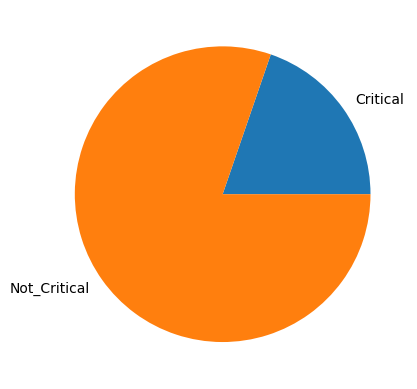

In [17]:
print('Number of Critical cases : ', critical)
print('Number of Non-critical cases : ', non_critical)

plt.pie([critical,non_critical], labels=['Critical', 'Not_Critical'], radius=1)
plt.show()

Displaying the killed count

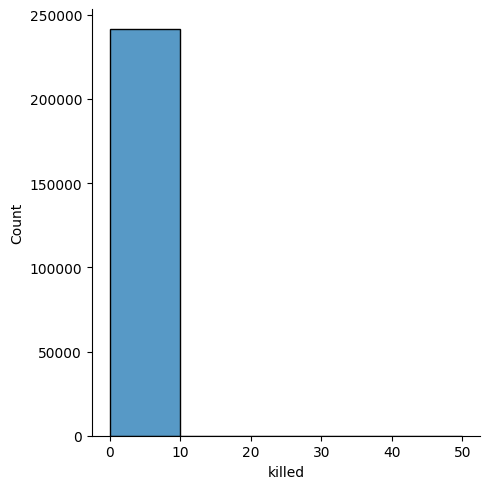

In [18]:
sns.displot(gun_data,x="killed",binwidth=10)

Displaying the injured count

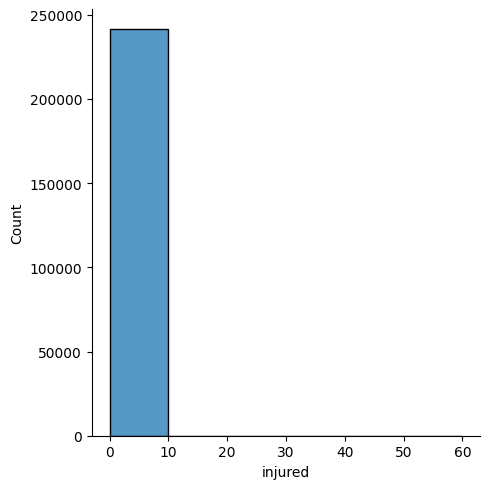

In [19]:
sns.displot(gun_data,x="injured",binwidth=10)

Checking the rate of critical gun crimes

Text(0.5, 1.0, 'Rate_of_critical_gun_crimes')

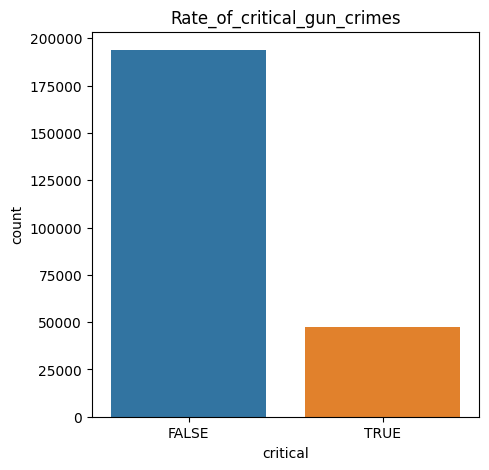

In [20]:
sns.countplot(x = gun_data['critical'])
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.title('Rate_of_critical_gun_crimes')

Displaying the killed count by the states

array([[<Axes: title={'center': 'Alabama'}>,
        <Axes: title={'center': 'Alaska'}>,
        <Axes: title={'center': 'Arizona'}>,
        <Axes: title={'center': 'Arkansas'}>,
        <Axes: title={'center': 'California'}>,
        <Axes: title={'center': 'Colorado'}>,
        <Axes: title={'center': 'Connecticut'}>,
        <Axes: title={'center': 'Delaware'}>,
        <Axes: title={'center': 'District of Columbia'}>],
       [<Axes: title={'center': 'Florida'}>,
        <Axes: title={'center': 'Georgia'}>,
        <Axes: title={'center': 'Hawaii'}>,
        <Axes: title={'center': 'Idaho'}>,
        <Axes: title={'center': 'Illinois'}>,
        <Axes: title={'center': 'Indiana'}>,
        <Axes: title={'center': 'Iowa'}>,
        <Axes: title={'center': 'Kansas'}>,
        <Axes: title={'center': 'Kentucky'}>],
       [<Axes: title={'center': 'Louisiana'}>,
        <Axes: title={'center': 'Maine'}>,
        <Axes: title={'center': 'Maryland'}>,
        <Axes: title={'center': 'Ma

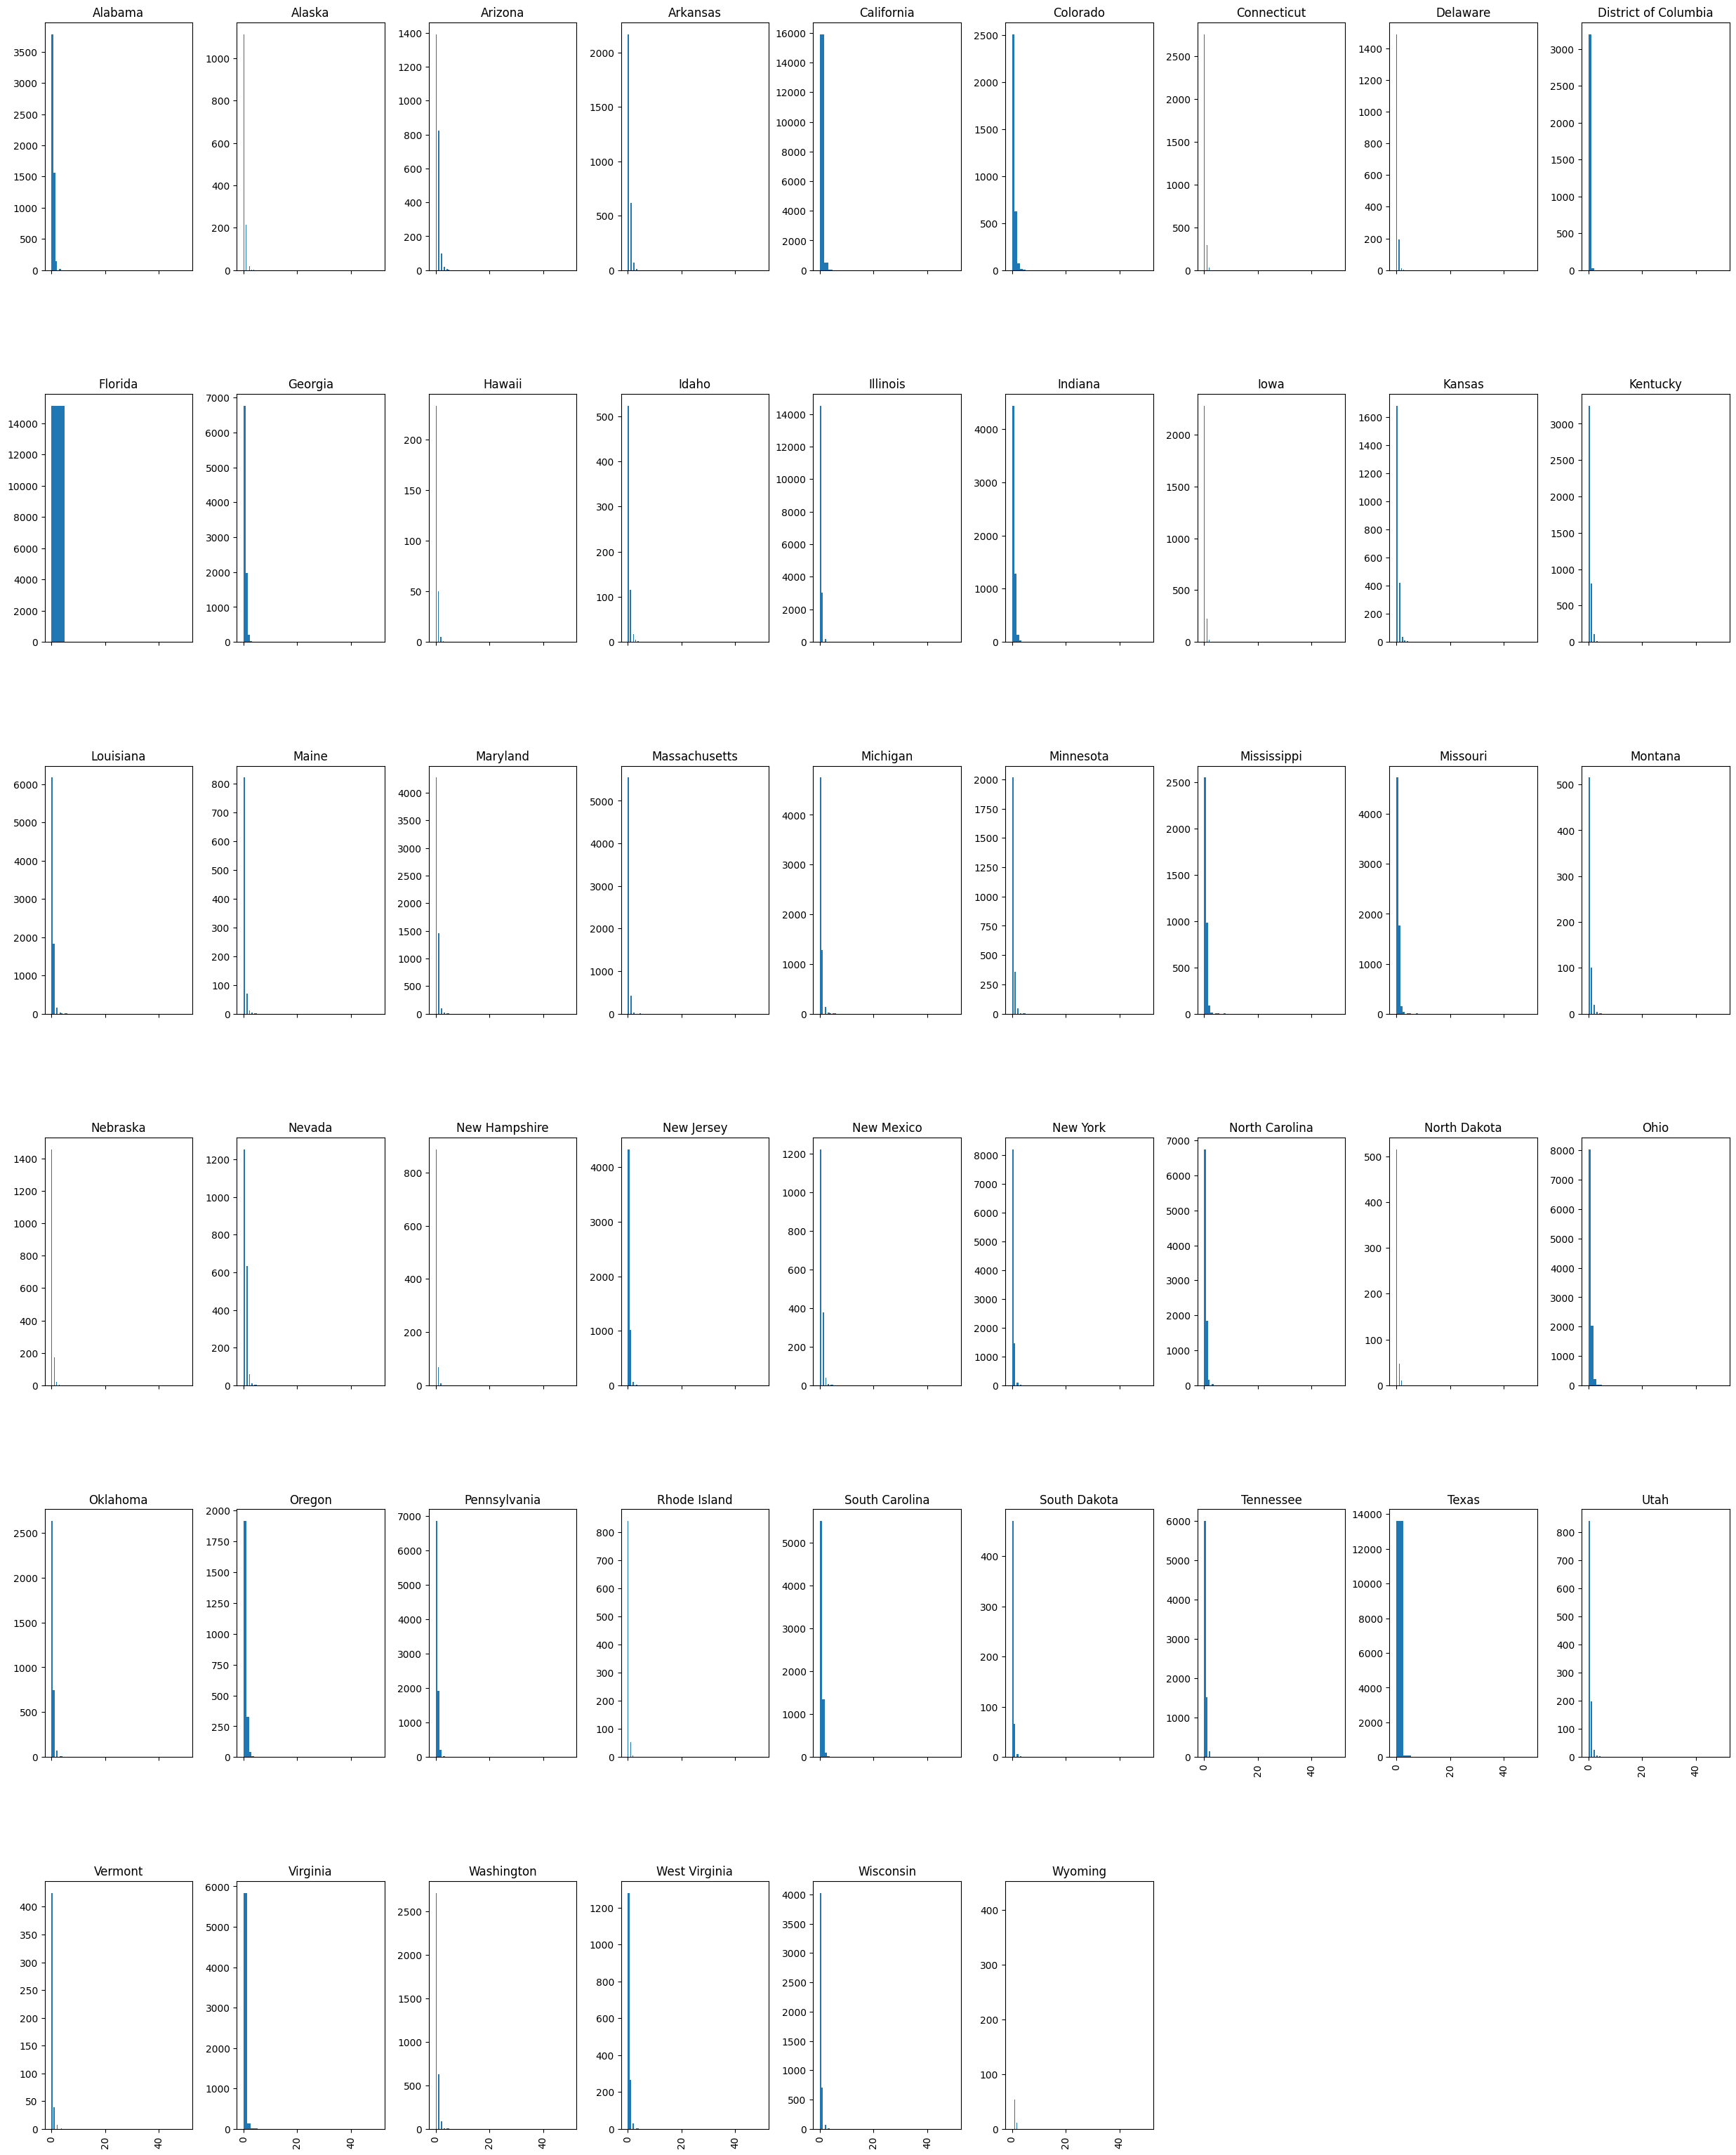

In [21]:
gun_data.hist(column='killed',by='state',layout=(6,9),figsize=(30,40),sharex=True)

Displaying the injured count by the states

array([[<Axes: title={'center': 'Alabama'}>,
        <Axes: title={'center': 'Alaska'}>,
        <Axes: title={'center': 'Arizona'}>,
        <Axes: title={'center': 'Arkansas'}>,
        <Axes: title={'center': 'California'}>,
        <Axes: title={'center': 'Colorado'}>,
        <Axes: title={'center': 'Connecticut'}>,
        <Axes: title={'center': 'Delaware'}>,
        <Axes: title={'center': 'District of Columbia'}>],
       [<Axes: title={'center': 'Florida'}>,
        <Axes: title={'center': 'Georgia'}>,
        <Axes: title={'center': 'Hawaii'}>,
        <Axes: title={'center': 'Idaho'}>,
        <Axes: title={'center': 'Illinois'}>,
        <Axes: title={'center': 'Indiana'}>,
        <Axes: title={'center': 'Iowa'}>,
        <Axes: title={'center': 'Kansas'}>,
        <Axes: title={'center': 'Kentucky'}>],
       [<Axes: title={'center': 'Louisiana'}>,
        <Axes: title={'center': 'Maine'}>,
        <Axes: title={'center': 'Maryland'}>,
        <Axes: title={'center': 'Ma

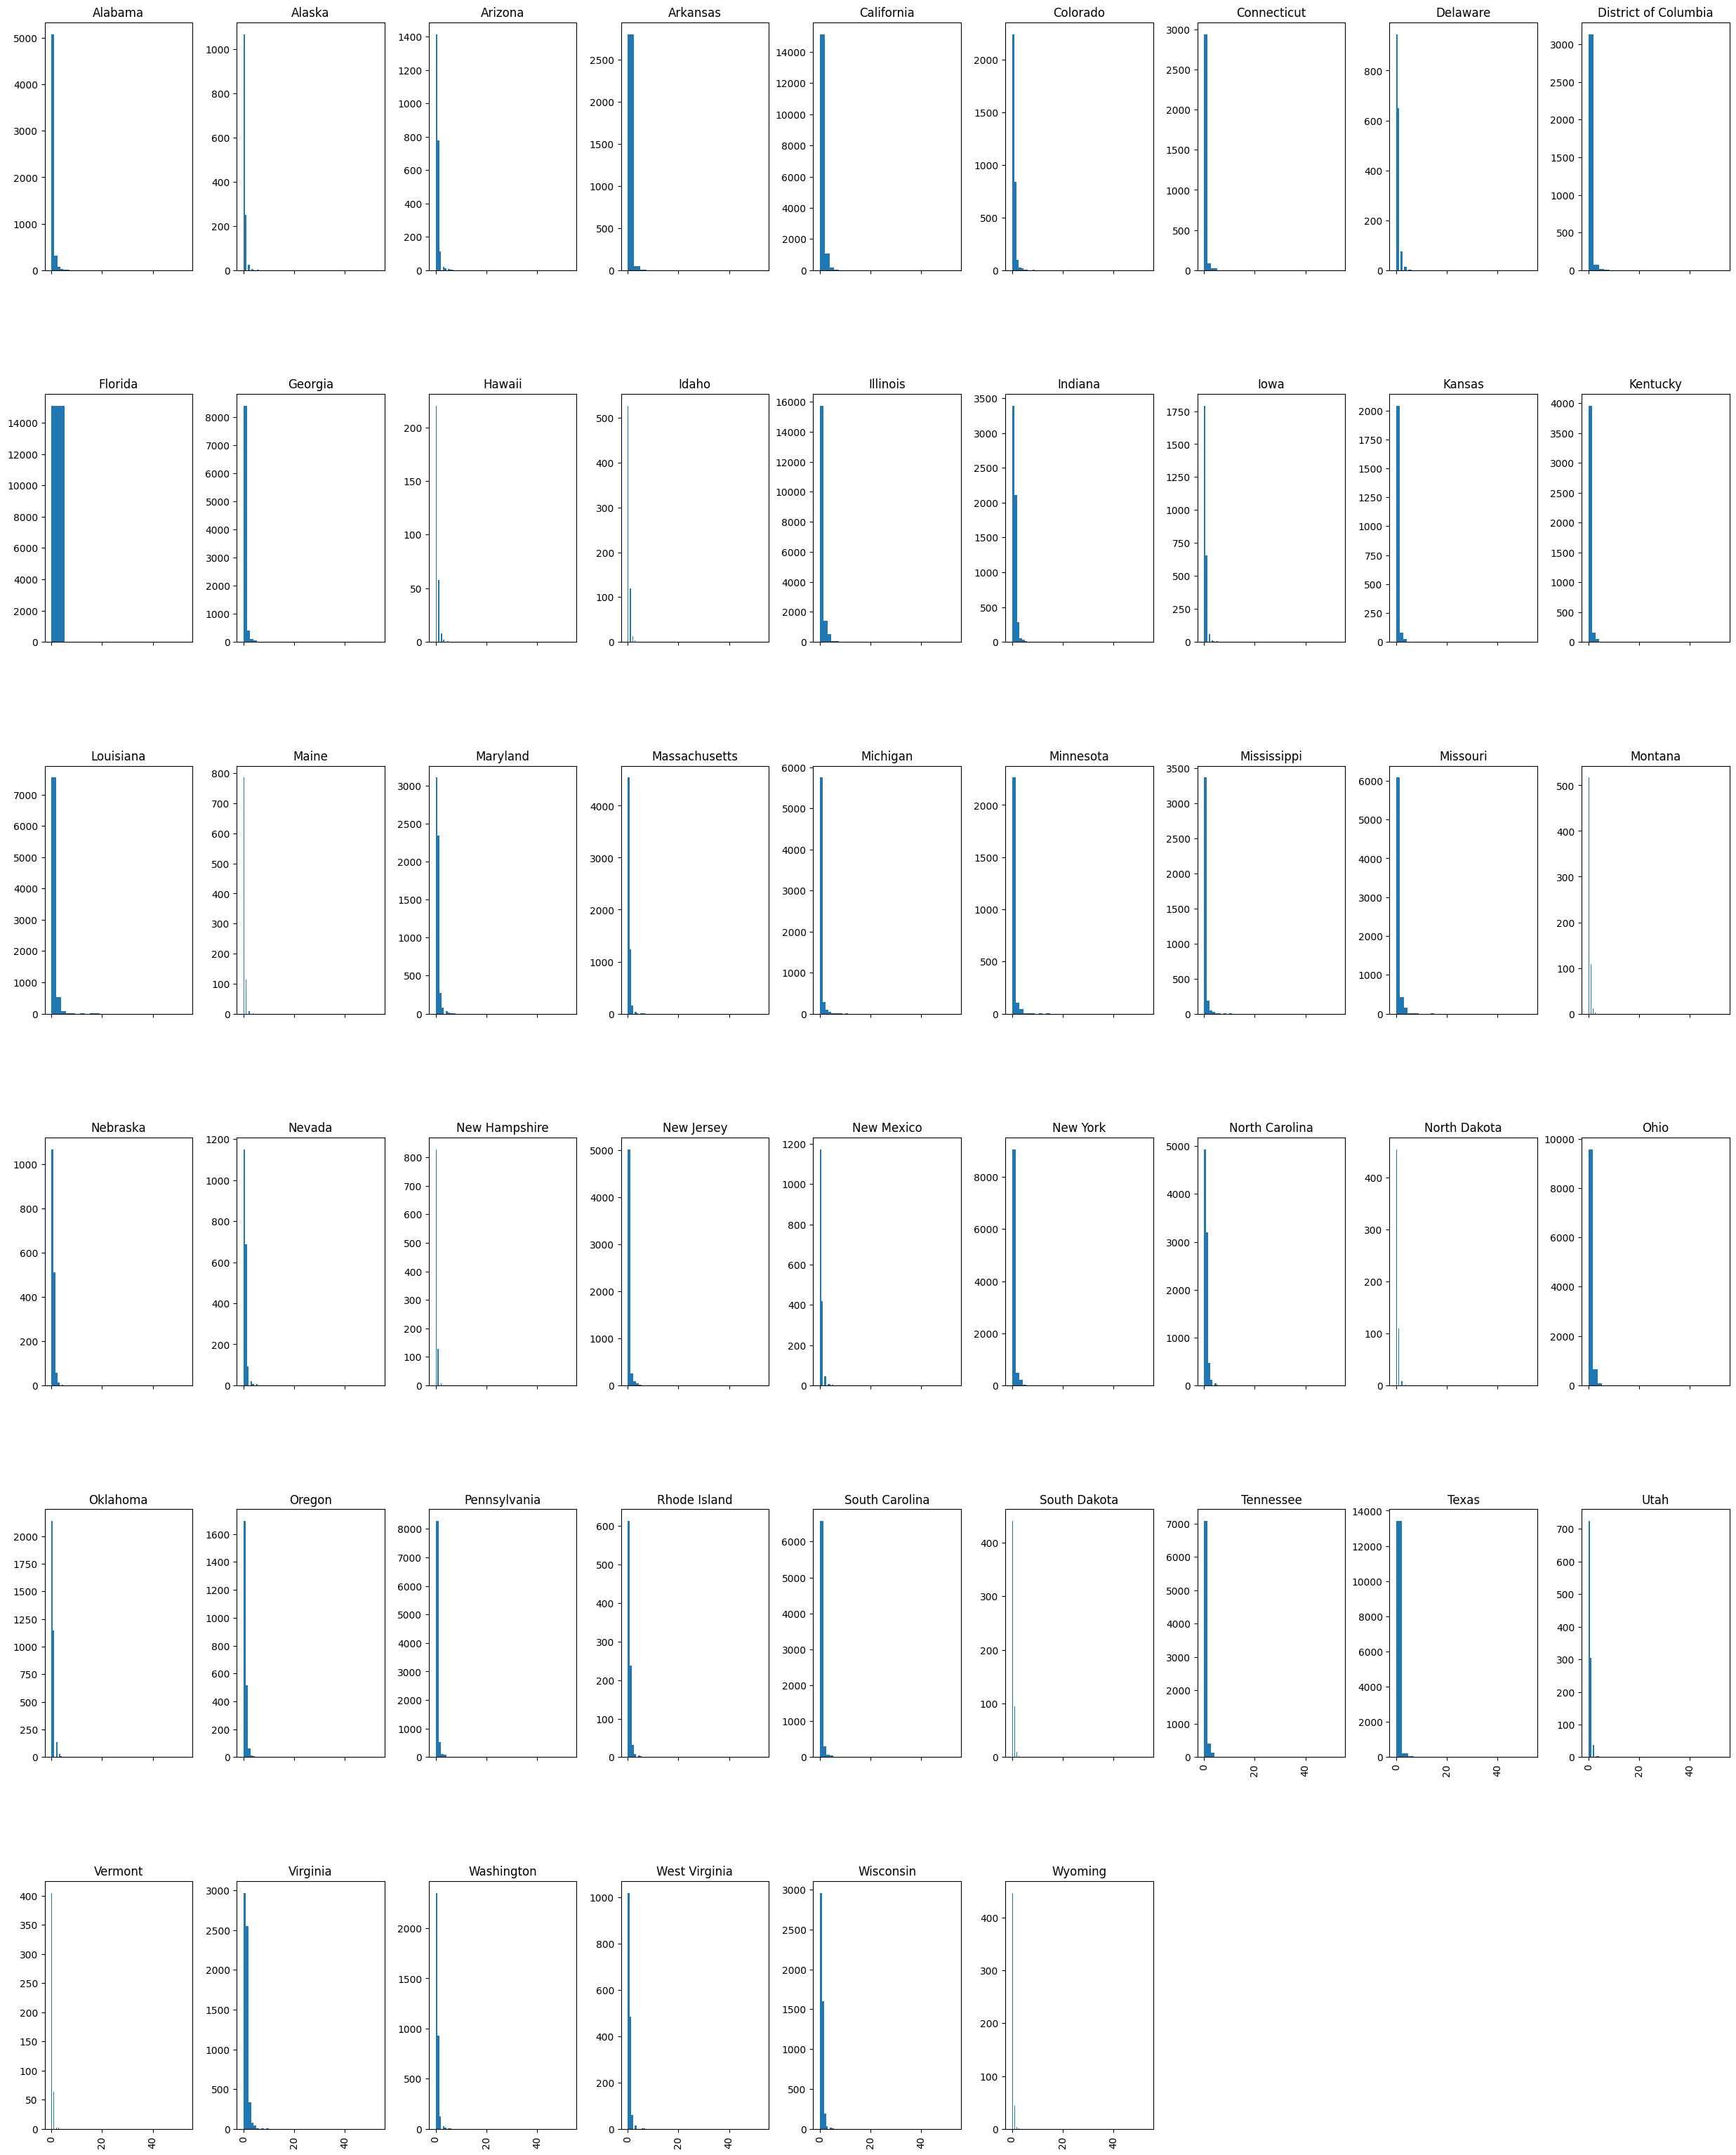

In [22]:
gun_data.hist(column='injured',by='state',layout=(6,9),figsize=(30,40),sharex=True)

In [23]:
gun_data['date'] = pd.to_datetime(gun_data['date'])
gun_data['date'] = pd.DatetimeIndex(gun_data['date'])

<Axes: title={'center': 'Number of Gun violence by Month'}, xlabel='Month'>

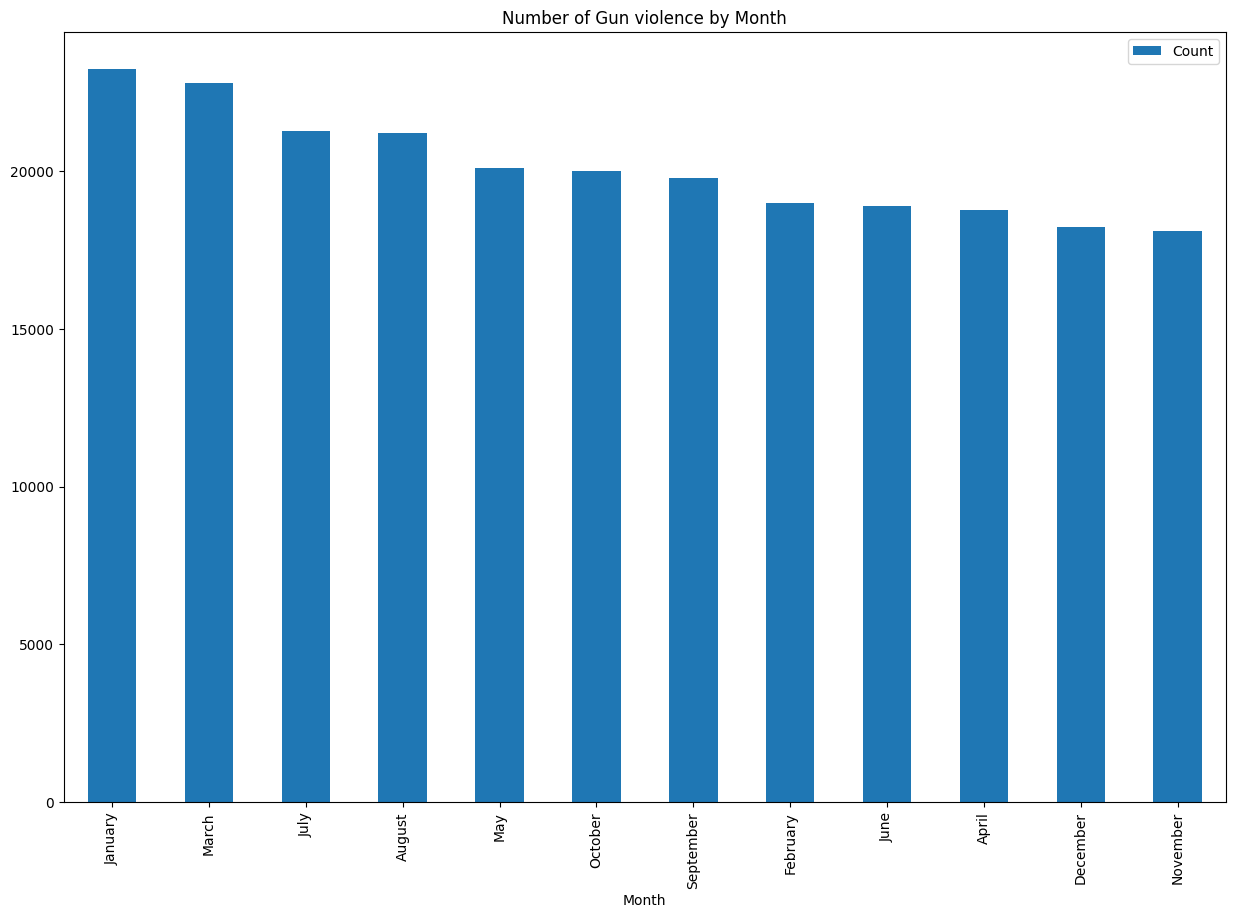

In [24]:
MonthDF = pd.DataFrame({'Count':pd.DatetimeIndex(gun_data['date']).month_name().value_counts()})
MonthDF.index.name= "Month"
MonthDF.dtypes
MonthDF.plot(kind='bar', title = "Number of Gun violence by Month", figsize=(15,10))

<Axes: title={'center': 'Number of Gun violence by Day of Month'}, xlabel='Day'>

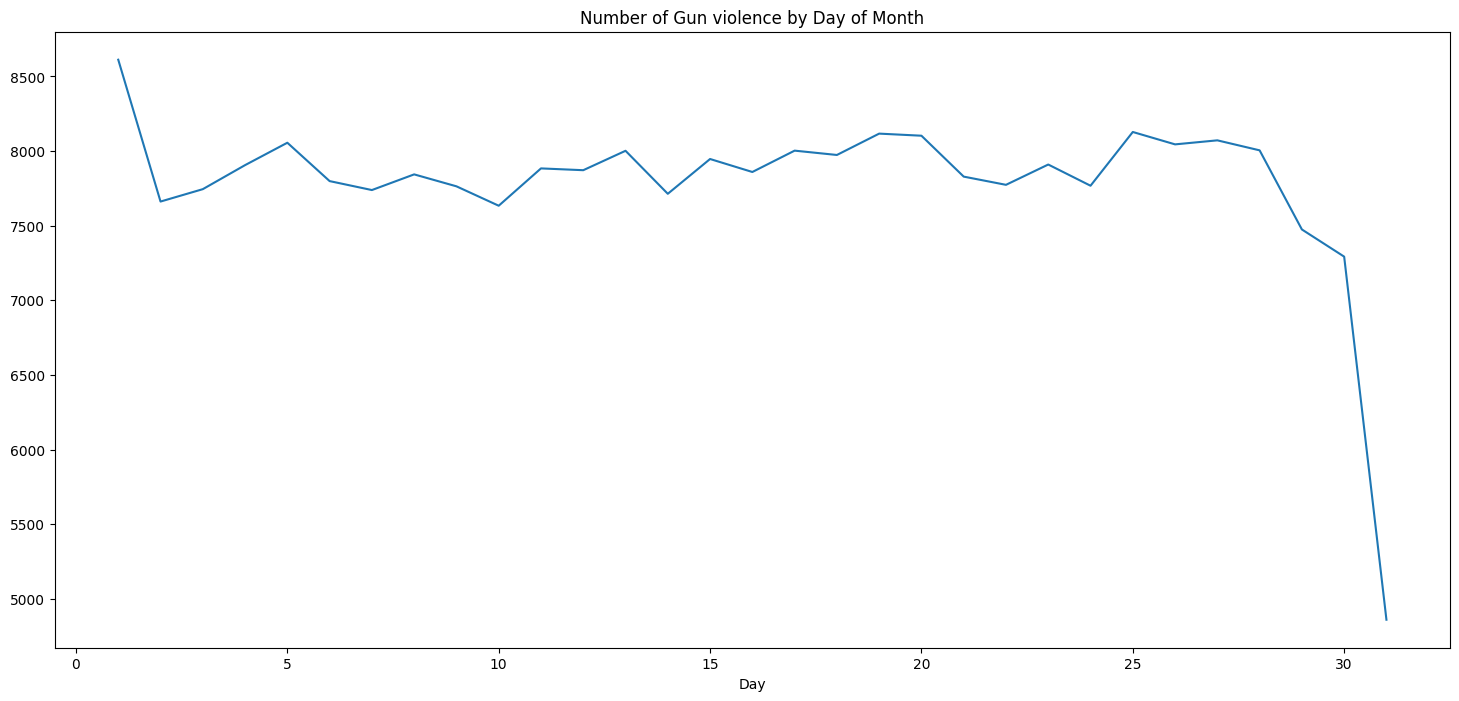

In [25]:
year = pd.DatetimeIndex(gun_data['date']).day.value_counts()
year = year.rename_axis("Day")
year.sort_index().plot(kind='line', title = "Number of Gun violence by Day of Month", figsize=(18,8))

<ipython-input-26-cd27c23b78a1>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gun_data.groupby('state').agg('sum')['killed'].sort_values().plot(kind='barh', figsize = (15,15), title="Number of Deaths in every states")


<Axes: title={'center': 'Number of Deaths in every states'}, ylabel='state'>

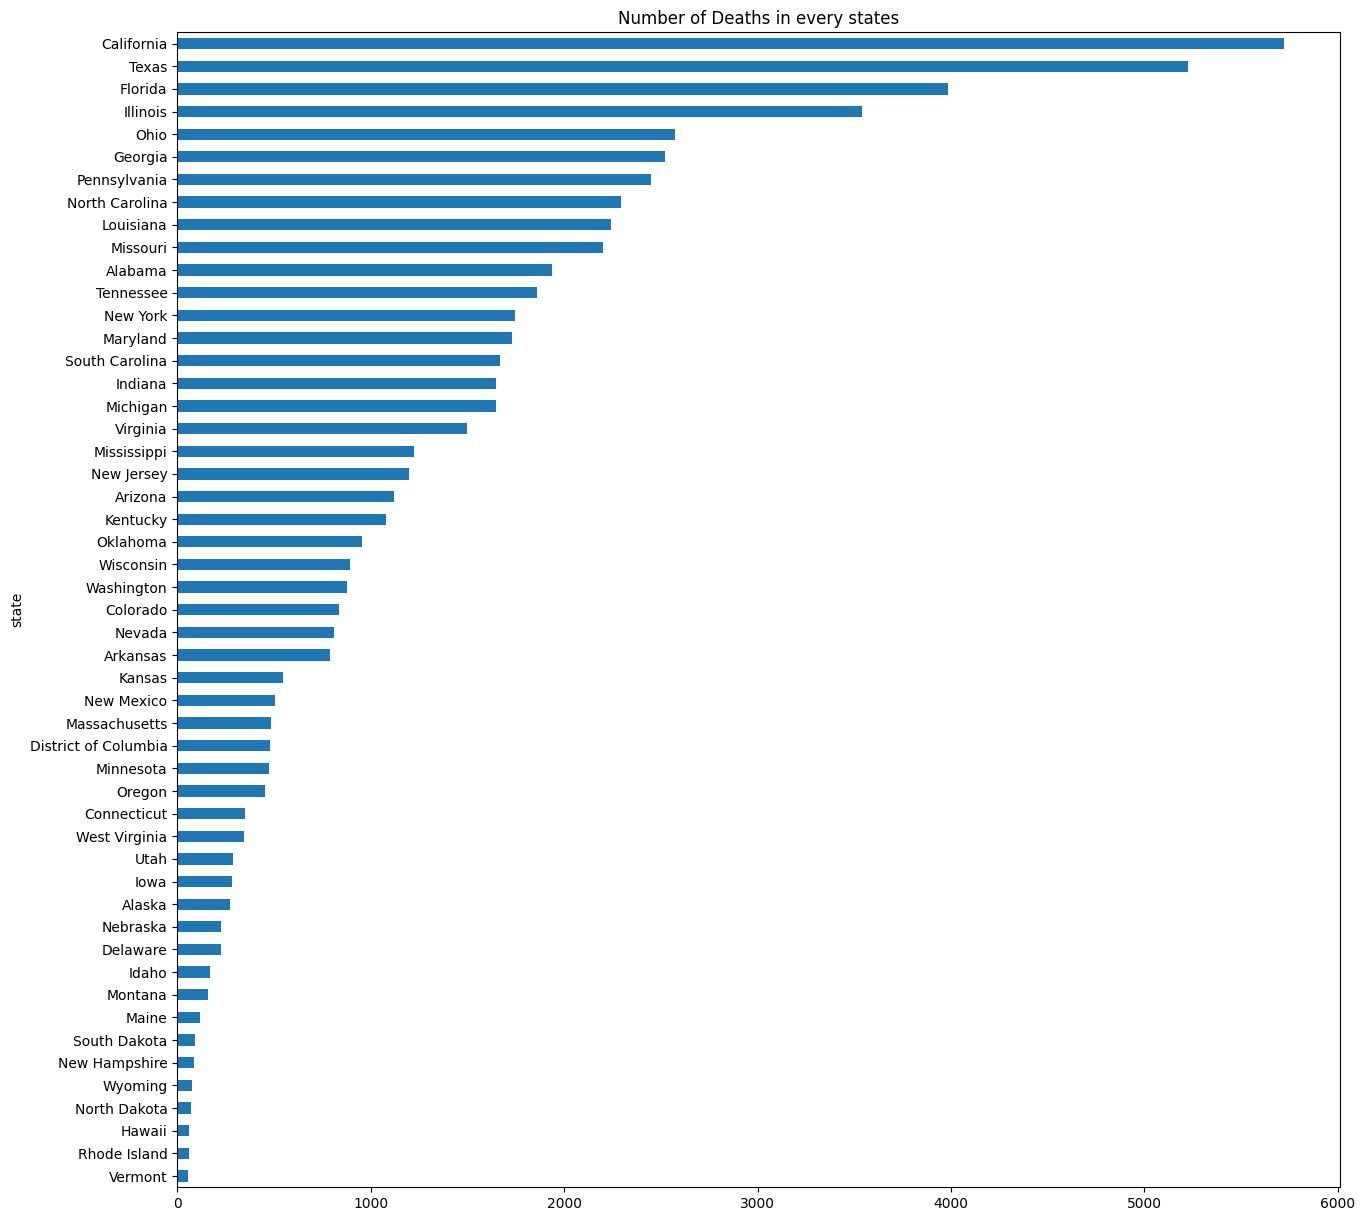

In [26]:
gun_data.groupby('state').agg('sum')['killed'].sort_values().plot(kind='barh', figsize = (15,15), title="Number of Deaths in every states")

<ipython-input-27-c4e984cf89ad>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = gun_data.groupby('state').agg('sum')[['killed','injured']]


<Axes: title={'center': 'Gun Casualty by state'}, xlabel='state'>

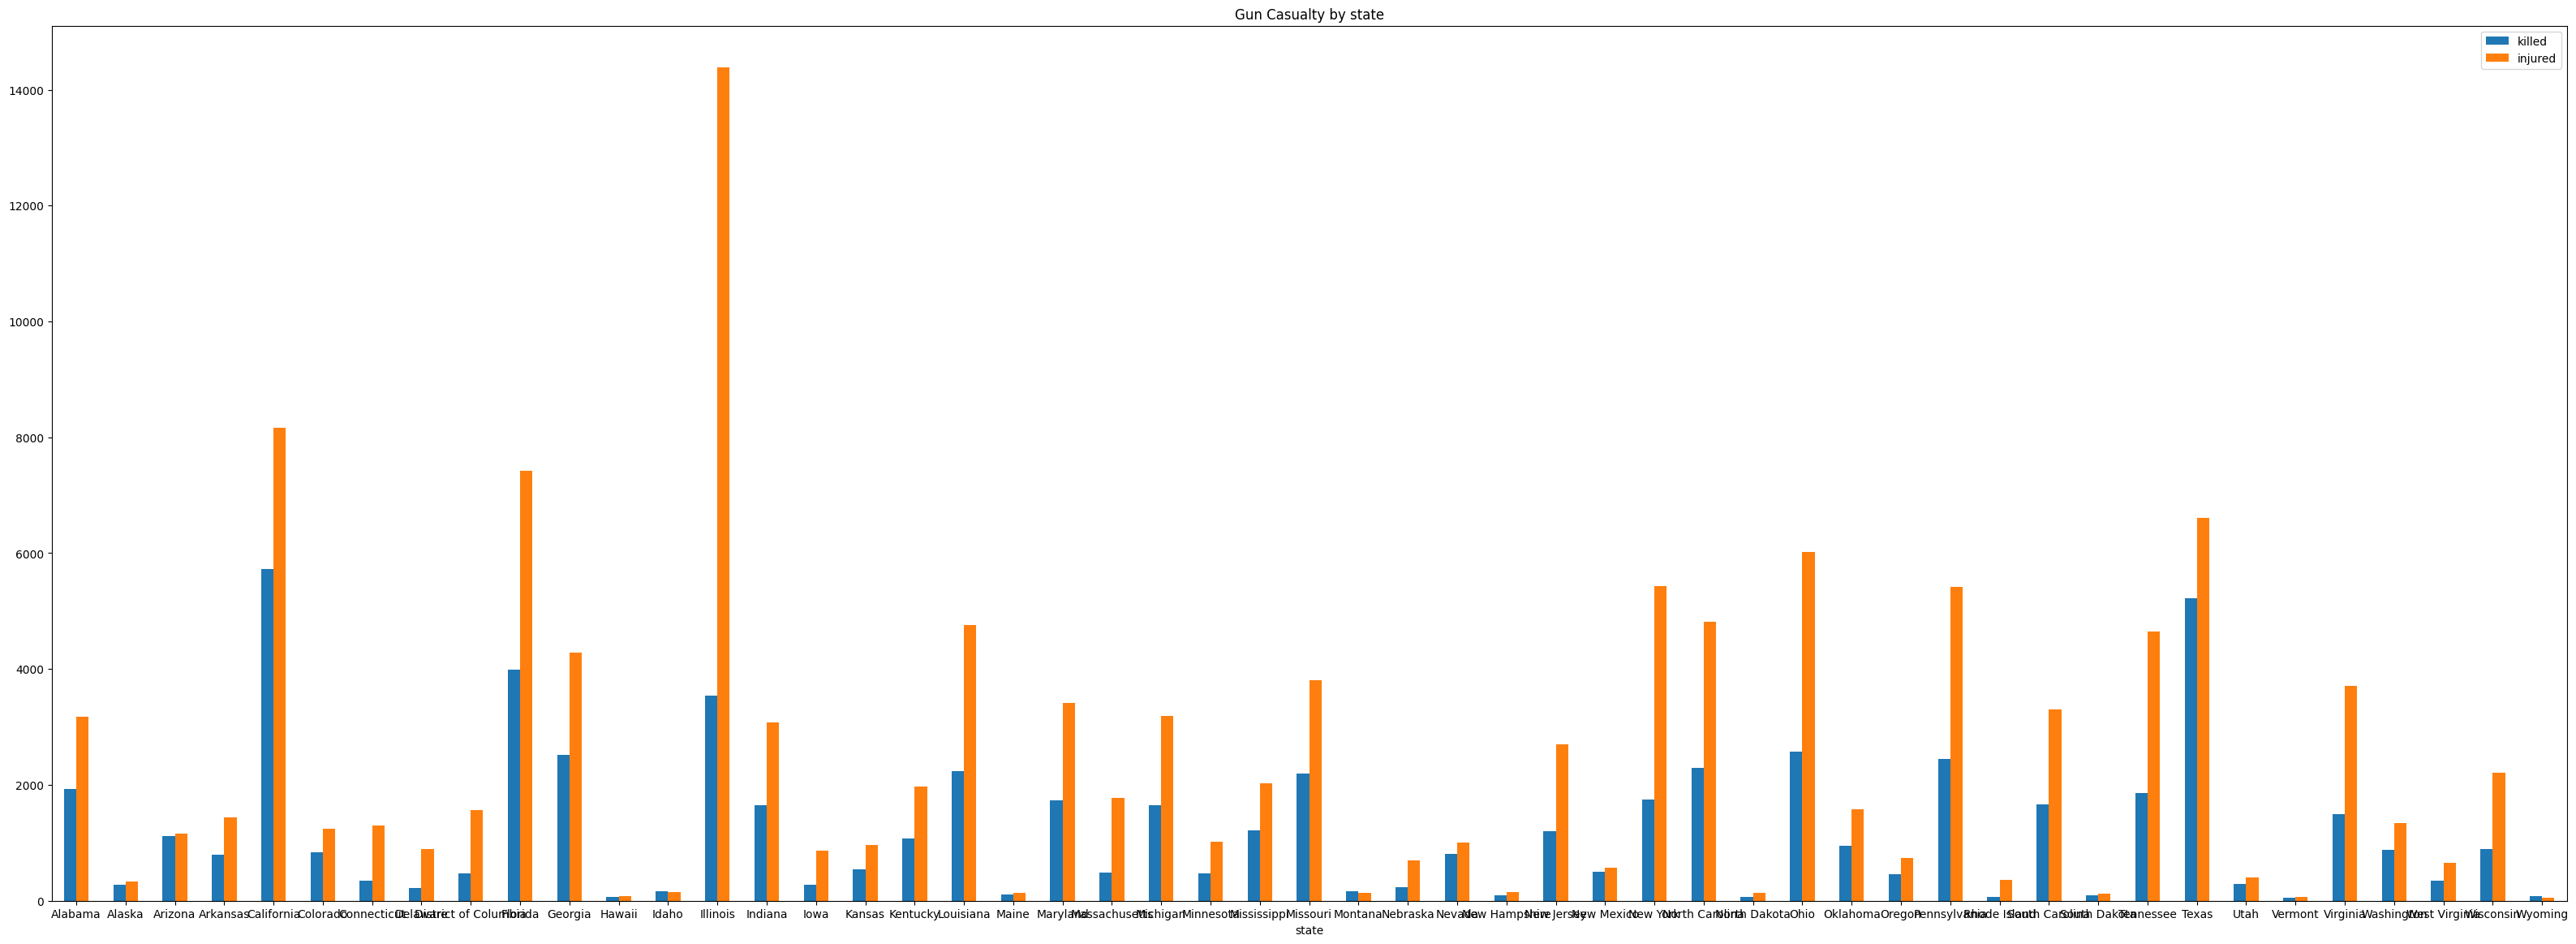

In [27]:
df = gun_data.groupby('state').agg('sum')[['killed','injured']]
df.plot(kind='bar', rot=0, figsize = (40,14), title="Gun Casualty by state")

In [28]:
gun_data['year'] = pd.DatetimeIndex(gun_data['date']).year
gun_data['month'] = pd.DatetimeIndex(gun_data['date']).month_name()
gun_data['day'] = pd.DatetimeIndex(gun_data['date']).day
gun_data.head()

,incident_id,date,day,state,city_or_county,address,killed,injured,incident_url,source_url,...,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district,critical,year,month
0,461105,2013-01-01,1,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,...,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN,FALSE,2013,January
1,460726,2013-01-01,1,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,...,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62,35,FALSE,2013,January
2,478855,2013-01-01,1,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,...,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56,13,FALSE,2013,January
3,478925,2013-01-05,5,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,...,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40,28,TRUE,2013,January
4,478959,2013-01-07,7,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,...,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62,27,FALSE,2013,January


<Axes: title={'center': 'Number of Casaulties by Year'}, xlabel='year'>

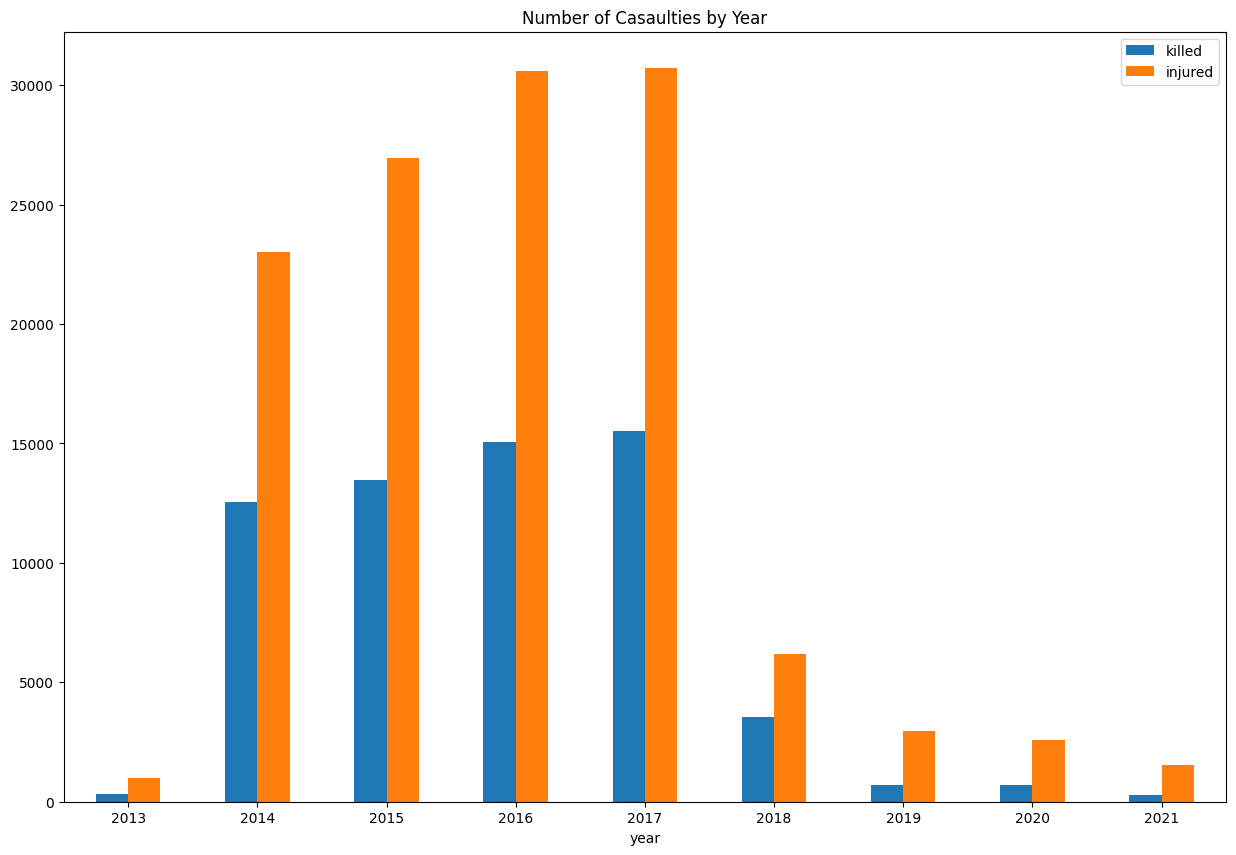

In [29]:
df = gun_data.groupby('year')[['killed','injured']].agg('sum')
df = df.rename(index=str, columns={"n_killed":"People Killed",'n_injured':'People Injured'})
df.plot(kind='bar', rot=0, title="Number of Casaulties by Year", figsize=(15,10))

<Axes: title={'center': 'Number of Casaulties by Month'}, xlabel='month'>

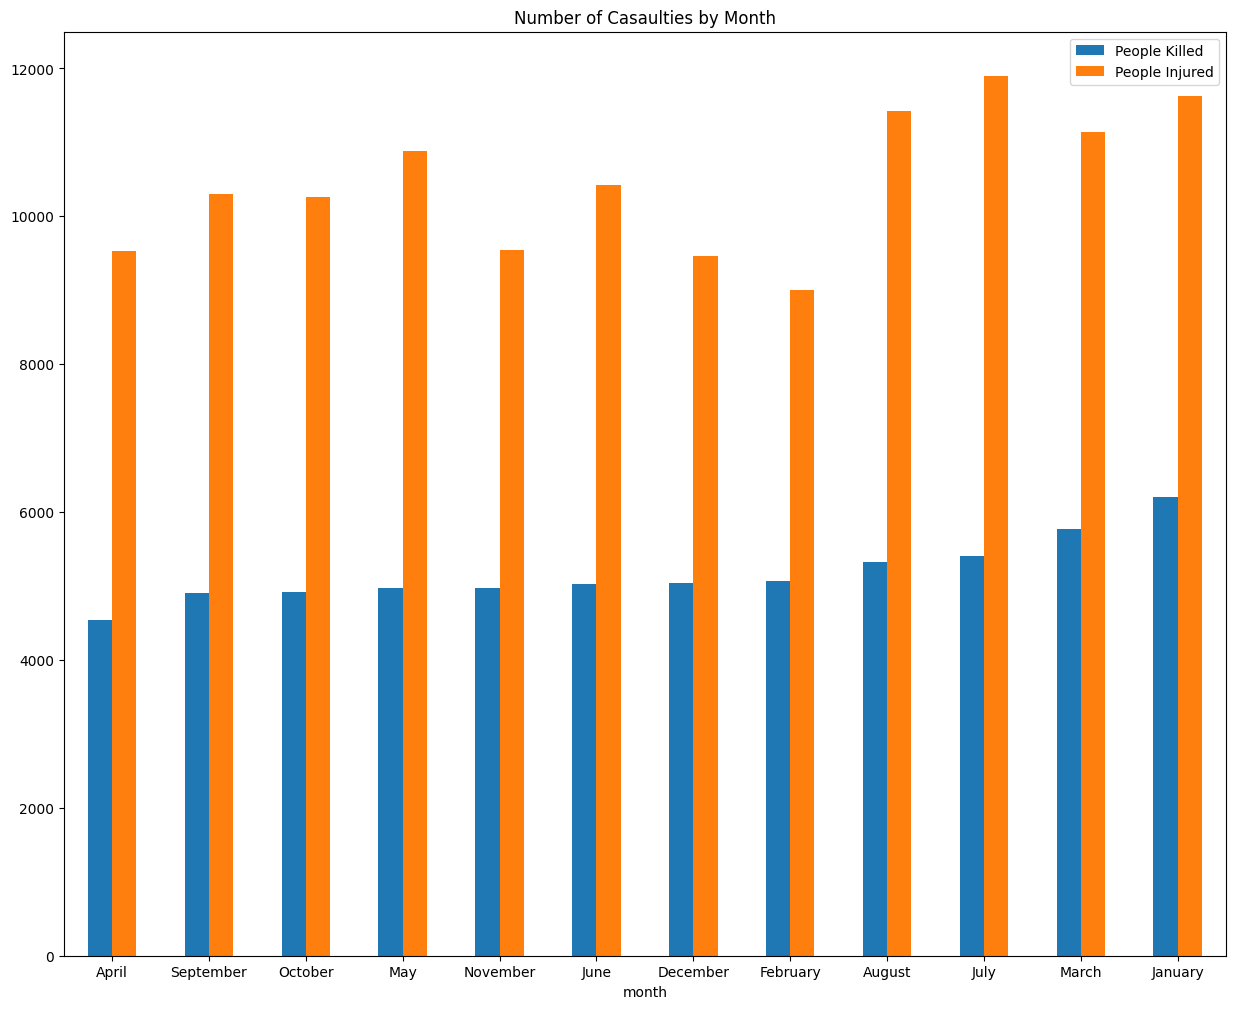

In [30]:
df = gun_data.groupby('month')[['killed','injured']].agg('sum')
df = df.rename(index=str, columns={"killed":"People Killed",'injured':'People Injured'})
df.sort_values(by='People Killed').plot(kind='bar', rot=0, title="Number of Casaulties by Month", figsize=(15,12))

<Axes: title={'center': 'Number of deaths by day of the month'}, ylabel='day'>

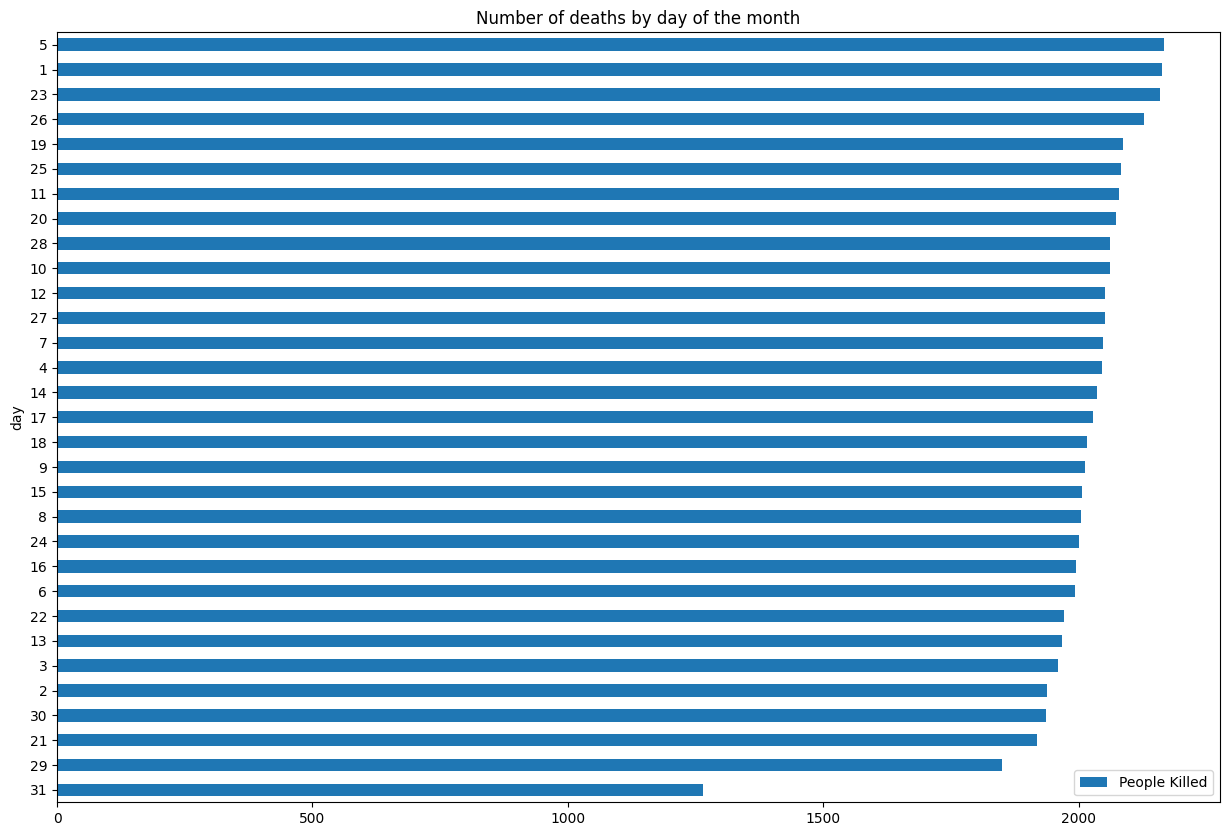

In [31]:
df = gun_data.groupby('day')[['killed']].agg('sum')
df = df.rename(index=str, columns={"killed":"People Killed"})
df.sort_values(by='People Killed', ascending = True).plot(kind='barh', title="Number of deaths by day of the month", figsize=(15,10))

In [32]:
gun_data['monthandday'] = gun_data['month'].map(str) + " "+ gun_data['day'].map(str)
gun_data.head()

,incident_id,date,day,state,city_or_county,address,killed,injured,incident_url,source_url,...,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district,critical,year,month,monthandday
0,461105,2013-01-01,1,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,...,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN,FALSE,2013,January,January 1
1,460726,2013-01-01,1,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,...,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62,35,FALSE,2013,January,January 1
2,478855,2013-01-01,1,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56,13,FALSE,2013,January,January 1
3,478925,2013-01-05,5,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40,28,TRUE,2013,January,January 5
4,478959,2013-01-07,7,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62,27,FALSE,2013,January,January 7


<Axes: title={'center': 'Top 10 Days with maximum number of Gun Violence'}>

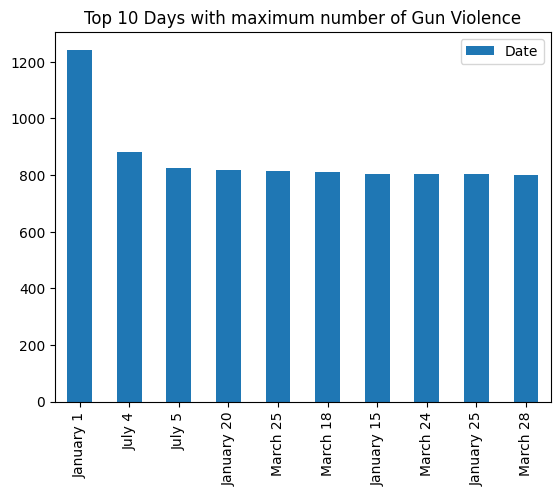

In [33]:
baddaydf = pd.DataFrame(gun_data['monthandday'].value_counts())
baddaydf = baddaydf.rename(index=str, columns={'monthandday' :'Date'})
baddaydf[0:10].plot(kind ='bar', title="Top 10 Days with maximum number of Gun Violence")

<Axes: title={'center': 'Top 10 days of month by Number of deaths'}, ylabel='monthandday'>

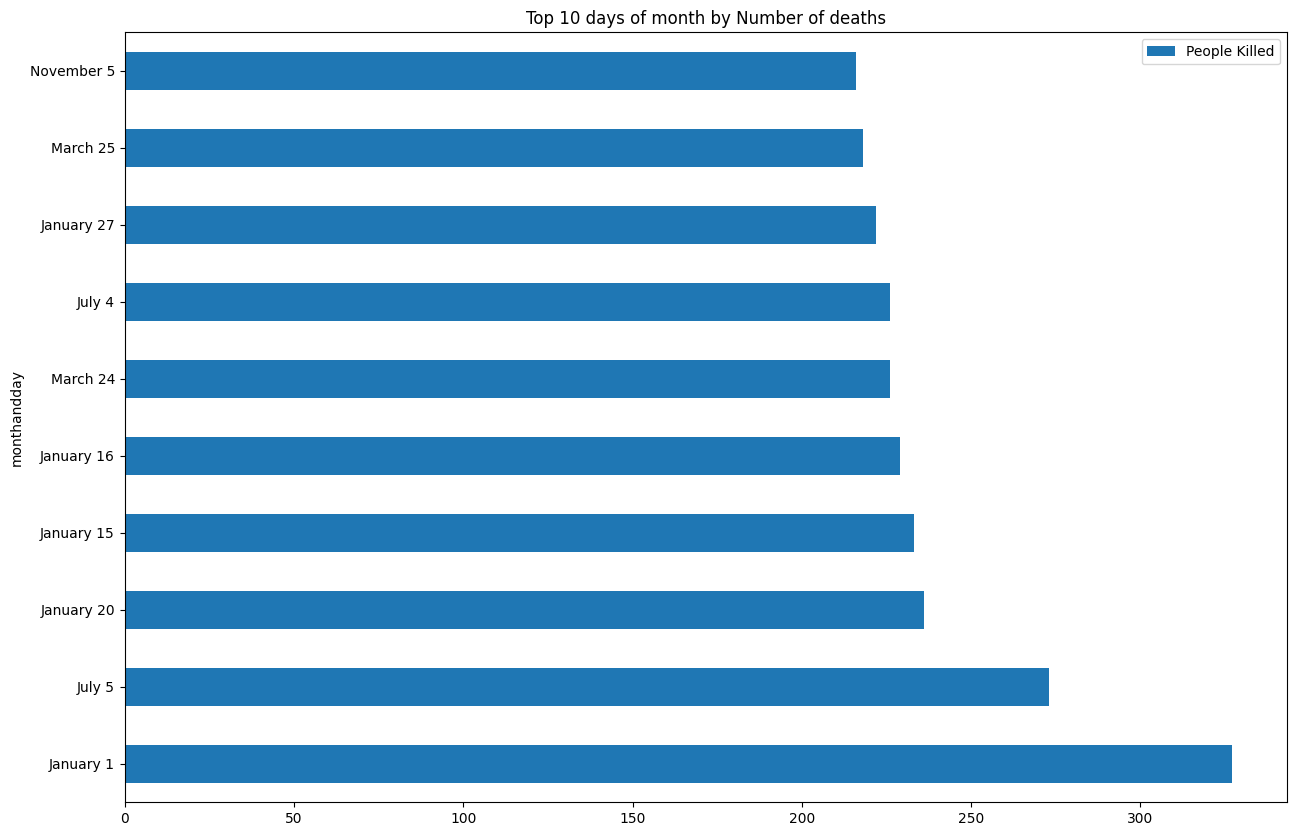

In [34]:
df = gun_data.groupby('monthandday')[['killed']].agg('sum')
df = df.rename(index=str, columns={"killed":"People Killed"})
df = df.sort_values('People Killed', ascending = False)
df[0:10].plot(kind='barh', title="Top 10 days of month by Number of deaths", figsize=(15,10))

In [35]:
gun_data.columns

Index(['incident_id', 'date', 'day', 'state', 'city_or_county', 'address',
       'killed', 'injured', 'incident_url', 'source_url',
       'incident_url_fields_missing', 'congressional_district', 'gun_stolen',
       'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'n_guns_involved', 'notes',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_name', 'participant_relationship', 'participant_status',
       'participant_type', 'sources', 'state_house_district',
       'state_senate_district', 'critical', 'year', 'month', 'monthandday'],
      dtype='object')

In [36]:
gun_data.head()

,incident_id,date,day,state,city_or_county,address,killed,injured,incident_url,source_url,...,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district,critical,year,month,monthandday
0,461105,2013-01-01,1,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,...,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN,FALSE,2013,January,January 1
1,460726,2013-01-01,1,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,...,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62,35,FALSE,2013,January,January 1
2,478855,2013-01-01,1,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56,13,FALSE,2013,January,January 1
3,478925,2013-01-05,5,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40,28,TRUE,2013,January,January 5
4,478959,2013-01-07,7,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62,27,FALSE,2013,January,January 7


In [37]:
gun_data.dropna(how = 'any', subset = ['incident_characteristics', 'state_house_district', 'congressional_district', 'state_senate_district'], inplace = True)
gun_data['participant_age_group'].fillna('0::Unknown', inplace = True)
def agegroup_cleanup(row):
    agegroup_row_values = []
    agegroup_row = str(row).split("||")
    for x in agegroup_row :
        agegroup_row_value = str(x).split("::")
        if len(agegroup_row_value) > 1 :
            agegroup_row_values.append(agegroup_row_value[1])
    return agegroup_row_values
agegroupvalues = gun_data.participant_age_group.apply(agegroup_cleanup)
gun_data["agegroup_child"] = agegroupvalues.apply(lambda x: x.count("Child 0-11"))
gun_data["agegroup_teen"] = agegroupvalues.apply(lambda x: x.count("Teen 12-17"))
gun_data["agegroup_adult"] = agegroupvalues.apply(lambda x: x.count("Adult 18+"))
gun_data = gun_data[gun_data['incident_characteristics'].str.contains('Non-Shooting Incident') == False]
gun_data['date'] = pd.to_datetime(gun_data.date)
gun_data['year'] = gun_data.date.dt.year
gun_data['month'] = gun_data.date.dt.month
gun_data['monthday'] = gun_data.date.dt.day
gun_data['weekday'] = gun_data.date.dt.weekday
city_list = gun_data['city_or_county'].value_counts().head(15).index.tolist()
gun_data = gun_data[gun_data['city_or_county'].apply(lambda x: x in city_list)]
gun_data['participant_gender'].fillna('0::Unknown', inplace = True)
def gender_cleanup(row):
    gender_row_values = []
    gender_row = str(row).split("||")
    for x in gender_row :
        gender_row_value = str(x).split("::")
        if len(gender_row_value) > 1 :
            gender_row_values.append(gender_row_value[1])   
    return gender_row_values
participant_genders = gun_data.participant_gender.apply(gender_cleanup)
gun_data["participant_gender_male"] = participant_genders.apply(lambda x: x.count("Male"))
gun_data["participant_gender_female"] = participant_genders.apply(lambda x: x.count("Female"))
gun_data['city_or_county'] = pd.Categorical(gun_data.city_or_county)
gun_data['mapped_cities'] = gun_data.city_or_county.cat.codes
gun_data.drop(['city_or_county','state','date','participant_gender','participant_age_group','incident_characteristics'], axis = 1, inplace = True)
gun_data.drop(['address','incident_url','source_url','incident_url_fields_missing'],axis = 1, inplace = True)


In [38]:
gun_data.head()

,incident_id,day,killed,injured,congressional_district,gun_stolen,gun_type,latitude,location_description,longitude,...,month,monthandday,agegroup_child,agegroup_teen,agegroup_adult,monthday,weekday,participant_gender_male,participant_gender_female,mapped_cities
7,479374,21,0,5,2,NaN,NaN,29.9435,NaN,-90.0836,...,1,January 21,0,0,0,21,0,5,0,12
11,479413,25,1,3,1,0::Unknown,0::Unknown,38.7067,NaN,-90.2494,...,1,January 25,0,0,1,25,4,1,0,14
15,479573,2,0,5,9,0::Unknown,0::Handgun,35.0803,Club Venue,-89.8871,...,2,February 2,0,0,5,2,5,0,6,10
17,479592,7,0,4,2,NaN,NaN,41.7592,NaN,-87.5628,...,2,February 7,0,0,6,7,3,4,0,1
18,479603,9,0,4,2,0::Unknown,0::Handgun,29.9563,NaN,-90.0676,...,2,February 9,0,0,7,9,5,5,2,12


In [46]:
gun_data.columns

Index(['incident_id', 'day', 'killed', 'injured', 'congressional_district',
       'gun_stolen', 'gun_type', 'latitude', 'location_description',
       'longitude', 'n_guns_involved', 'notes', 'participant_age',
       'participant_name', 'participant_relationship', 'participant_status',
       'participant_type', 'sources', 'state_house_district',
       'state_senate_district', 'critical', 'year', 'month', 'monthandday',
       'agegroup_child', 'agegroup_teen', 'agegroup_adult', 'monthday',
       'weekday', 'participant_gender_male', 'participant_gender_female',
       'mapped_cities'],
      dtype='object')

In [47]:
gun = gun_data[['incident_id','day','killed','injured','state_house_district','agegroup_adult','mapped_cities']]
gun.head()

,incident_id,day,killed,injured,state_house_district,agegroup_adult,mapped_cities
7,479374,21,0,5,93,0,12
11,479413,25,1,3,76,1,14
15,479573,2,0,5,84,5,10
17,479592,7,0,4,25,6,1
18,479603,9,0,4,93,7,12


In [56]:
gun.killed = gun.killed.astype(object)
gun.injured = gun.injured.astype(object)
gun.day = gun.day.astype(object)
gun.agegroup_adult = gun.agegroup_adult.astype(object)
gun.mapped_cities = gun.mapped_cities.astype(object)

In [57]:
# Select feature variables and store them as a numpy array
X = gun.drop('killed',axis = 1)
X_col = X.columns
X = X.values

X2 = gun.drop('injured', axis = 1)
X2_col = X2.columns
X2 = X2.values

# Select response variables and store them as a numpy array
y = gun['killed'].values
y2 = gun['injured'].values

In [60]:
steps = [('scaler', StandardScaler()), ('clf', DummyRegressor(strategy='mean'))]
pipeline = Pipeline(steps)
# Create the train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# Fit the data into the pipeline
pipeline.fit(X_train,y_train)
# Predict the response variables using the test data
y_pred = pipeline.predict(X_test)

# Computing the baseline R-squared
print('Baseline R-squared (n_killed): {0:.4f}'.format(pipeline.score(X_test, y_test)))

#Computing the baseline RMSE
y_pred = pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Baseline Root Mean Squared Error (n_killed): {0:.4f}'.format(rmse))
cv_scores = cross_val_score(pipeline,X,y,cv=10)
print("Baseline Average 10-Fold CV Score (n_killed): {0:.4f}".format(np.mean(cv_scores)))

# Repeat the steps for n_injured
steps = [('scaler', StandardScaler()), ('clf', DummyRegressor(strategy='mean'))]
pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.3, random_state = 23)
pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_test)
print('\nBaseline R-squared (n_injured): {0:.5f}'.format(pipeline.score(X_test, y_test)))
y_pred = pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Baseline Root Mean Squared Error (n_injured): {0:.4f}'.format(rmse))
cv_scores = cross_val_score(pipeline,X2,y2,cv=10)
print("Baseline Average 10-Fold CV Score (n_injured): {0:.4f}".format(np.mean(cv_scores)))

Baseline R-squared (n_killed): -0.0001
Baseline Root Mean Squared Error (n_killed): 0.5067
Baseline Average 10-Fold CV Score (n_killed): -0.0053

Baseline R-squared (n_injured): -0.00002
Baseline Root Mean Squared Error (n_injured): 0.7654
Baseline Average 10-Fold CV Score (n_injured): -0.0126


In [61]:
steps = [('scaler', StandardScaler()), ('reg', LinearRegression())]
pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Measure the accuracy of the predictions by finding the R-squared and root mean squared error
print("R-squared (n_killed): {0:.4f}".format(pipeline.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (n_killed): {0:.4f}".format(rmse))
# Use Cross-Validation to better understand the model's performance using k-folds
cv_scores = cross_val_score(pipeline,X,y,cv=10)
print("Average 10-Fold CV Score (n_killed): {0:.4f}".format(np.mean(cv_scores)))

# Repeat the steps for n_injured
steps = [('scaler', StandardScaler()), ('reg', LinearRegression())]
pipeline2 = Pipeline(steps)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.3, random_state = 1)
pipeline2.fit(X_train2, y_train2)
y_pred2 = pipeline2.predict(X_test2)
print("\nR-squared (n_injured): {0:.4f}".format(pipeline2.score(X_test2, y_test2)))
rmse2 = np.sqrt(mean_squared_error(y_test2, y_pred2))
print("Root Mean Squared Error (n_injured): {0:.4f}".format(rmse2))
cv_scores2 = cross_val_score(pipeline,X2,y2,cv=10)
print("Average 10-Fold CV Score (n_injured): {0:.4f}".format(np.mean(cv_scores2)))

R-squared (n_killed): 0.2900
Root Mean Squared Error (n_killed): 0.4211
Average 10-Fold CV Score (n_killed): 0.2663

R-squared (n_injured): 0.3450
Root Mean Squared Error (n_injured): 0.6386
Average 10-Fold CV Score (n_injured): 0.3196


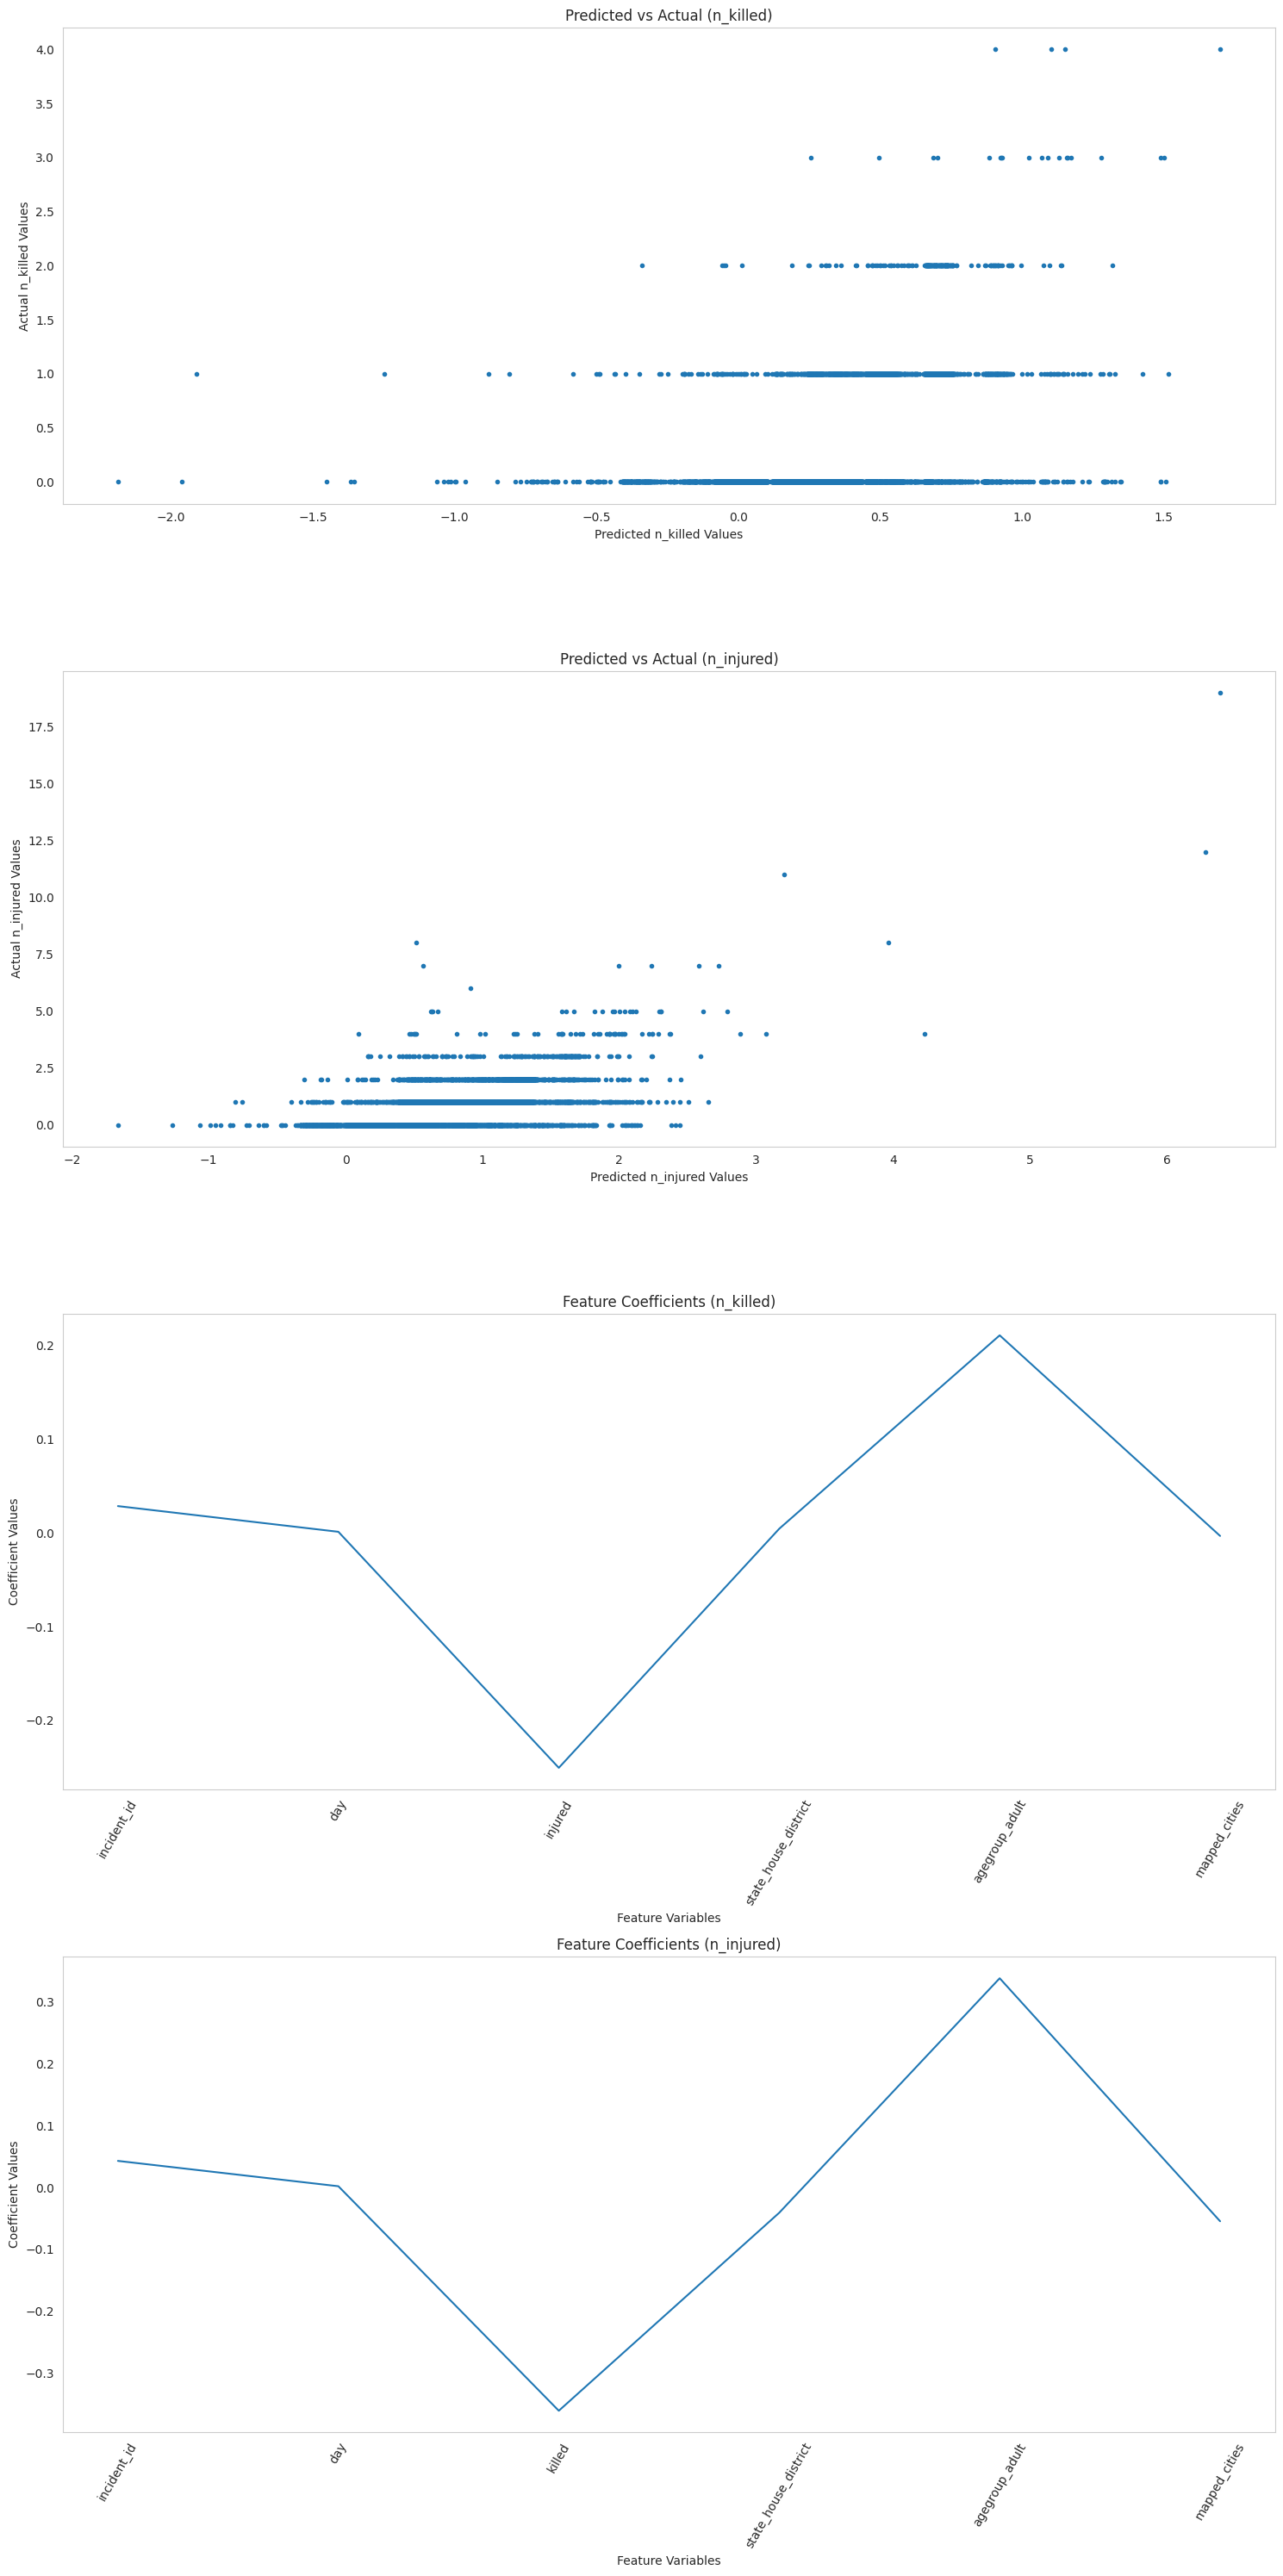

In [62]:
# Use a scatter plot to display the predicted vs actual values
sns.set_style("whitegrid", {'axes.grid' : False})
fig = plt.figure(figsize = (15,30))
_ = plt.subplot(4,1,1)
_ = plt.scatter(y_pred,y_test, marker = '.')
_ = plt.xlabel('Predicted n_killed Values')
_ = plt.ylabel('Actual n_killed Values')
_ = plt.title('Predicted vs Actual (n_killed)')

# Do the same for n_injured
_ = plt.subplot(4,1,2)
_ = plt.scatter(y_pred2,y_test2, marker = '.')
_ = plt.xlabel('Predicted n_injured Values')
_ = plt.ylabel('Actual n_injured Values')
_ = plt.title('Predicted vs Actual (n_injured)')

# Plot the coefficients 
reg_coef = pipeline.named_steps['reg'].coef_
_ = plt.subplot(4,1,3)
_ = plt.plot(range(len(X_col)),reg_coef)
_ = plt.xticks(range(len(X_col)),X_col,rotation=60)
_ = plt.xlabel('Feature Variables')
_ = plt.ylabel('Coefficient Values')
_ = plt.title('Feature Coefficients (n_killed)')

# Do the same for n_injured
reg_coef2 = pipeline2.named_steps['reg'].coef_
_ = plt.subplot(4,1,4)
_ = plt.plot(range(len(X2_col)),reg_coef2)
_ = plt.xticks(range(len(X2_col)),X2_col,rotation=60)
_ = plt.xlabel('Feature Variables')
_ = plt.ylabel('Coefficient Values')
_ = plt.title('Feature Coefficients (n_injured)')

_ = plt.tight_layout()

In [63]:
steps = [('scaler', StandardScaler()), ('lasso', Lasso())]
pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)
# Define the parameter values that will be searched
alphas = [0.001, 0.01, 0.1, 1, 10, 100]
# Create the parameter grid
param_grid = {'lasso__alpha':alphas}
# Instantiate the grid search
gscv = GridSearchCV(pipeline, param_grid, scoring = 'r2', n_jobs = -1, cv = 10)
# Fit the training data into the model
gscv.fit(X_train, y_train)
    
# Print the best score and its respective parameters
print('The best score is (n_killed):{0:.4f}'.format(gscv.best_score_))
print('The best parameters are (n_killed):',gscv.best_params_)

# Do the same for n_injured
steps = [('scaler', StandardScaler()), ('lasso', Lasso())]
pipeline2 = Pipeline(steps)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.3, random_state = 20)
alphas = [0.001, 0.01, 0.1, 1, 10, 100]
param_grid = {'lasso__alpha':alphas}
gscv2 = GridSearchCV(pipeline2, param_grid, scoring = 'r2', n_jobs = -1, cv = 10)
gscv2.fit(X_train2, y_train2)
print('\nThe best score is (n_injured):{0:.4f}'.format(gscv2.best_score_))
print('The best parameters are (n_injured):',gscv2.best_params_)

The best score is (n_killed):0.2860
The best parameters are (n_killed): {'lasso__alpha': 0.001}

The best score is (n_injured):0.3201
The best parameters are (n_injured): {'lasso__alpha': 0.001}


In [64]:
# Now use the best parameters to make predictions using the test data and compute the r-squared/RMSE
# (Note: The attribute .best_estimator_ returns the Lasso classifier with the optimal parameters)
best_lasso = gscv.best_estimator_
y_pred = best_lasso.predict(X_test)
print('R-squared (n_killed): {0:.4f}'.format(best_lasso.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error (n_killed): {0:.4f}".format(rmse))
cv_scores = cross_val_score(best_lasso,X,y,cv=10)
print("Average 10-Fold CV Score (n_killed): {0:.4f}".format(np.mean(cv_scores)))

# Do the same for n_injured
best_lasso2 = gscv2.best_estimator_
y_pred2 = best_lasso2.predict(X_test2)
print('\nR-squared (n_injured): {0:.4f}'.format(best_lasso2.score(X_test2, y_test2)))
rmse2 = np.sqrt(mean_squared_error(y_test2,y_pred2))
print("Root Mean Squared Error (n_injured): {0:.4f}".format(rmse2))
cv_scores2 = cross_val_score(best_lasso2,X2,y2,cv=10)
print("Average 10-Fold CV Score (n_injured): {0:.4f}".format(np.mean(cv_scores2)))

R-squared (n_killed): 0.2883
Root Mean Squared Error (n_killed): 0.4183
Average 10-Fold CV Score (n_killed): 0.2665

R-squared (n_injured): 0.3401
Root Mean Squared Error (n_injured): 0.6239
Average 10-Fold CV Score (n_injured): 0.3196


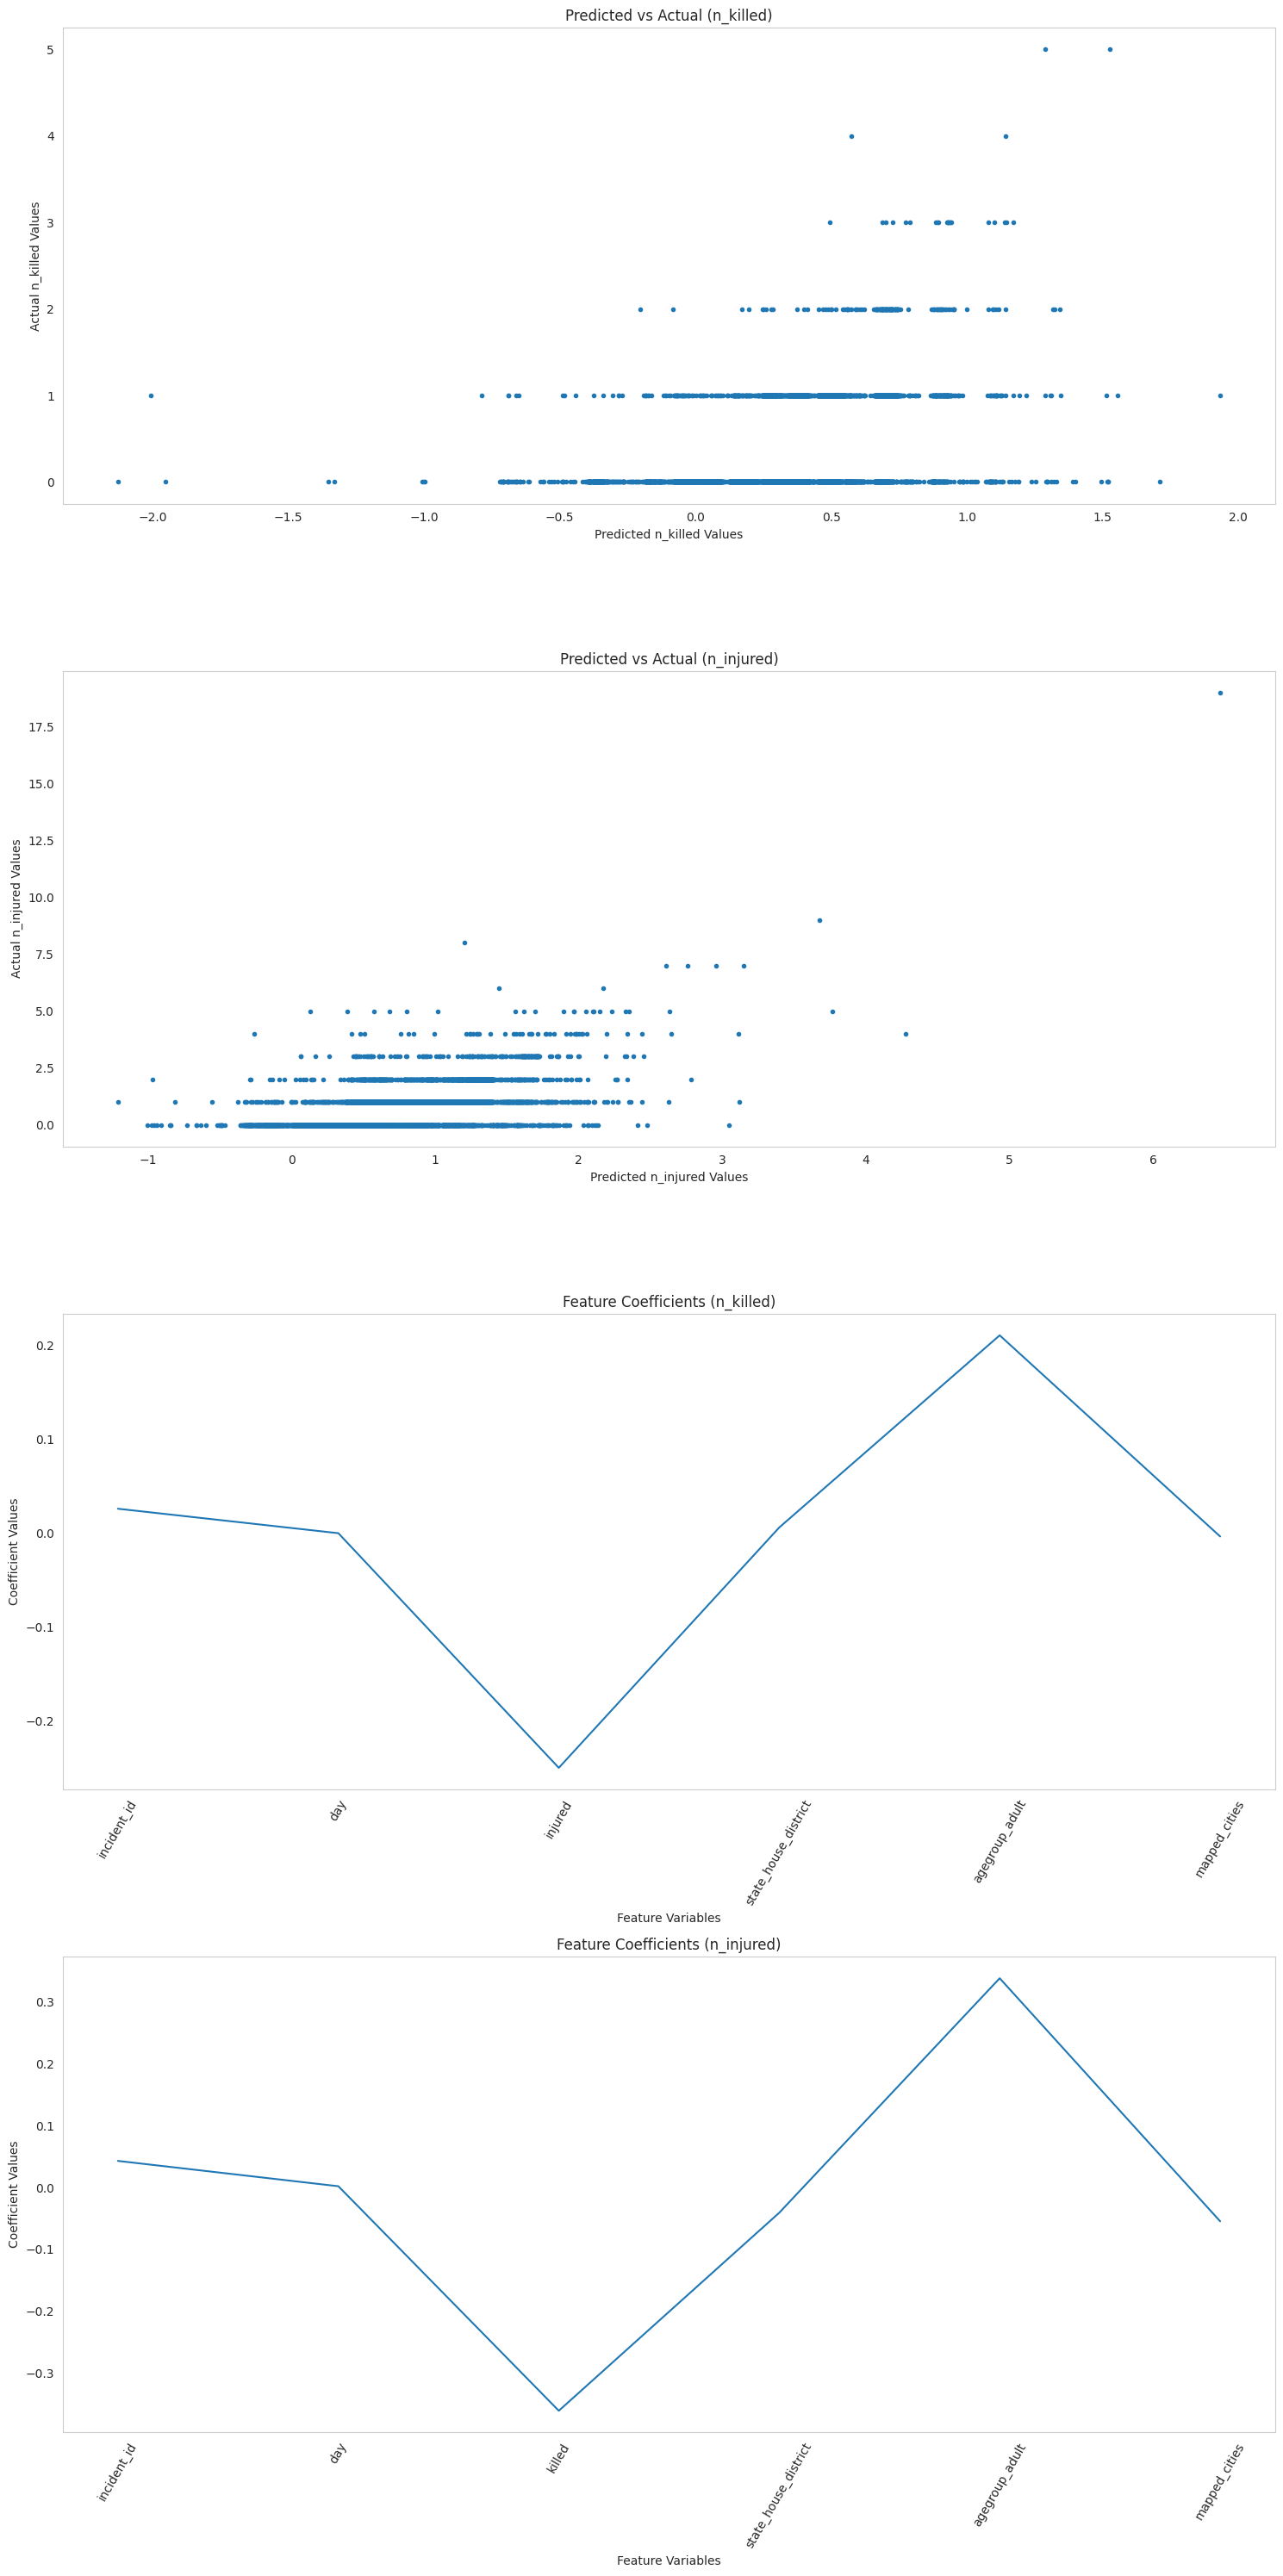

In [65]:
fig = plt.figure(figsize = (15,30))
_ = plt.subplot(4,1,1)
_ = plt.scatter(y_pred,y_test, marker = '.')
_ = plt.xlabel('Predicted n_killed Values')
_ = plt.ylabel('Actual n_killed Values')
_ = plt.title('Predicted vs Actual (n_killed)')

# Do the same for n_injured
_ = plt.subplot(4,1,2)
_ = plt.scatter(y_pred2,y_test2, marker = '.')
_ = plt.xlabel('Predicted n_injured Values')
_ = plt.ylabel('Actual n_injured Values')
_ = plt.title('Predicted vs Actual (n_injured)')

# Plot the coefficients 
lasso_coef = best_lasso.fit(X,y).named_steps['lasso'].coef_
_ = plt.subplot(4,1,3)
_ = plt.plot(range(len(X_col)),lasso_coef)
_ = plt.xticks(range(len(X_col)),X_col,rotation=60)
_ = plt.xlabel('Feature Variables')
_ = plt.ylabel('Coefficient Values')
_ = plt.title('Feature Coefficients (n_killed)')

# Do the same for n_injured
lasso_coef2 = best_lasso2.fit(X2,y2).named_steps['lasso'].coef_
_ = plt.subplot(4,1,4)
_ = plt.plot(range(len(X2_col)),reg_coef2)
_ = plt.xticks(range(len(X2_col)),X2_col,rotation=60)
_ = plt.xlabel('Feature Variables')
_ = plt.ylabel('Coefficient Values')
_ = plt.title('Feature Coefficients (n_injured)')

_ = plt.tight_layout()

In [66]:
steps = [('scaler', StandardScaler()), ('ridge', Ridge())]
pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3)
alphas = [0.001, 0.01, 0.1, 1, 10, 100]
param_grid = {'ridge__alpha':alphas}
gscv = GridSearchCV(pipeline, param_grid, scoring = 'r2', n_jobs = -1, cv = 10)
gscv.fit(X_train, y_train)
print('The best score is (n_killed):{0:.4f}'.format(gscv.best_score_))
print('The best parameters are (n_killed):',gscv.best_params_)

# Do the same for n_injured
steps = [('scaler', StandardScaler()), ('ridge', Lasso())]
pipeline2 = Pipeline(steps)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.3, random_state = 30)
alphas = [0.001, 0.01, 0.1, 1, 10, 100]
param_grid = {'ridge__alpha':alphas}
gscv2 = GridSearchCV(pipeline2, param_grid, scoring = 'r2', n_jobs = -1, cv = 10)
gscv2.fit(X_train2, y_train2)
print('\nThe best score is (n_injured):{0:.4f}'.format(gscv2.best_score_))
print('The best parameters are (n_injured):',gscv2.best_params_)

The best score is (n_killed):0.2922
The best parameters are (n_killed): {'ridge__alpha': 10}

The best score is (n_injured):0.3078
The best parameters are (n_injured): {'ridge__alpha': 0.001}


In [67]:
best_ridge = gscv.best_estimator_
y_pred = best_ridge.predict(X_test)
print('R-squared (n_killed): {0:.4f}'.format(best_ridge.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error (n_killed): {0:.4f}".format(rmse))
cv_scores = cross_val_score(best_ridge,X,y,cv=10)
print("Average 10-Fold CV Score (n_killed): {0:.4f}".format(np.mean(cv_scores)))

# Do the same for n_injured
best_ridge2 = gscv2.best_estimator_
y_pred2 = best_ridge2.predict(X_test2)
print('\nR-squared (n_injured): {0:.4f}'.format(best_ridge2.score(X_test2, y_test2)))
rmse2 = np.sqrt(mean_squared_error(y_test2,y_pred2))
print("Root Mean Squared Error (n_injured): {0:.4f}".format(rmse2))
cv_scores2 = cross_val_score(best_ridge2,X2,y2,cv=10)
print("Average 10-Fold CV Score (n_injured): {0:.4f}".format(np.mean(cv_scores2)))

R-squared (n_killed): 0.2734
Root Mean Squared Error (n_killed): 0.4214
Average 10-Fold CV Score (n_killed): 0.2664

R-squared (n_injured): 0.3594
Root Mean Squared Error (n_injured): 0.6431
Average 10-Fold CV Score (n_injured): 0.3196


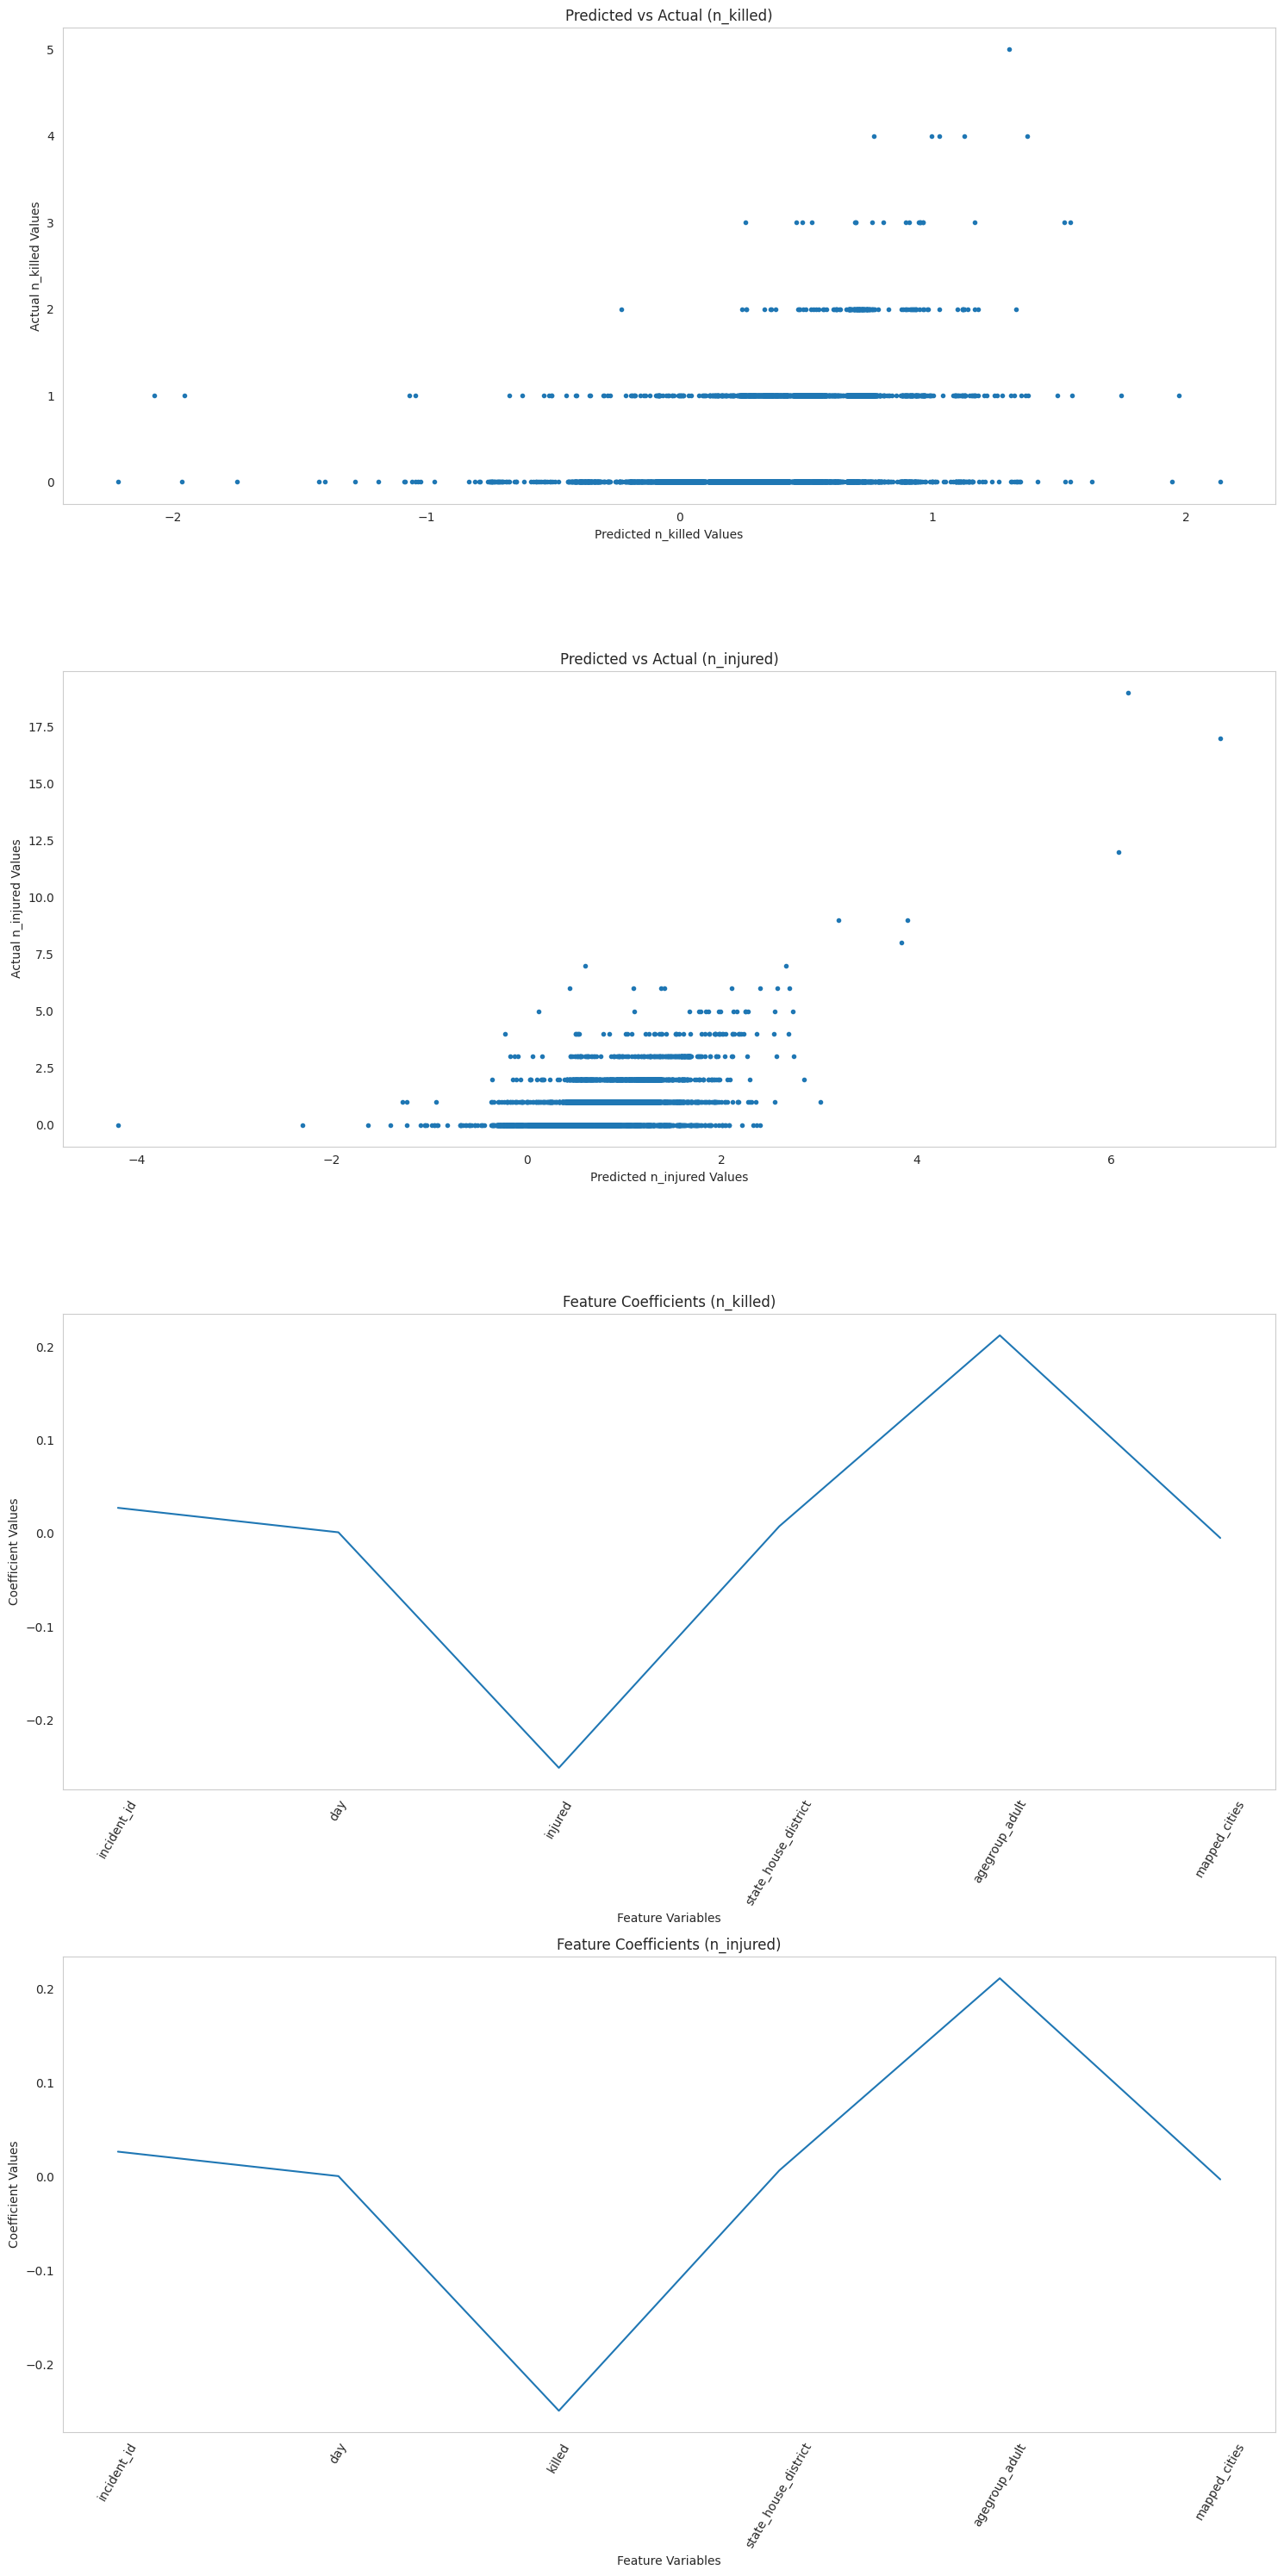

In [68]:
fig = plt.figure(figsize = (15,30))
_ = plt.subplot(4,1,1)
_ = plt.scatter(y_pred,y_test, marker = '.')
_ = plt.xlabel('Predicted n_killed Values')
_ = plt.ylabel('Actual n_killed Values')
_ = plt.title('Predicted vs Actual (n_killed)')

# Do the same for n_injured
_ = plt.subplot(4,1,2)
_ = plt.scatter(y_pred2,y_test2, marker = '.')
_ = plt.xlabel('Predicted n_injured Values')
_ = plt.ylabel('Actual n_injured Values')
_ = plt.title('Predicted vs Actual (n_injured)')

# Plot the coefficients 
ridge_coef = best_ridge.fit(X,y).named_steps['ridge'].coef_
_ = plt.subplot(4,1,3)
_ = plt.plot(range(len(X_col)),ridge_coef)
_ = plt.xticks(range(len(X_col)),X_col,rotation=60)
_ = plt.xlabel('Feature Variables')
_ = plt.ylabel('Coefficient Values')
_ = plt.title('Feature Coefficients (n_killed)')

# Do the same for n_injured
ridge_coef2 = best_ridge2.fit(X,y).named_steps['ridge'].coef_
_ = plt.subplot(4,1,4)
_ = plt.plot(range(len(X2_col)),ridge_coef2)
_ = plt.xticks(range(len(X2_col)),X2_col,rotation=60)
_ = plt.xlabel('Feature Variables')
_ = plt.ylabel('Coefficient Values')
_ = plt.title('Feature Coefficients (n_injured)')

_ = plt.tight_layout()

In [69]:
model_dict = {
    'Model for n_killed':['Base-line','Linear Regression','Linear Regression w/ Lasso', 'Linear Regression w/Ridge'],
    'R-Squared':[-0.0001, 0.3193, 0.3123, 0.2973],
    'RMSE':[0.5067, 0.4123, 0.4112, 0.4144]
}
pd.DataFrame(model_dict).set_index('Model for n_killed').sort_values(by='R-Squared', ascending = False)

,R-Squared,RMSE
Model for n_killed,,
Linear Regression,0.3193,0.4123
Linear Regression w/ Lasso,0.3123,0.4112
Linear Regression w/Ridge,0.2973,0.4144
Base-line,-0.0001,0.5067


In [70]:
model_dict2 = {
    'Model for n_injured':['Base-line','Linear Regression','Linear Regression w/ Lasso', 'Linear Regression w/Ridge'],
    'R-Squared':[0,0.4207, 0.4279, 0.4437],
    'RMSE':[0.7654, 0.6005, 0.5809, 0.5993]
}
pd.DataFrame(model_dict2).set_index('Model for n_injured').sort_values(by='R-Squared', ascending = False)

,R-Squared,RMSE
Model for n_injured,,
Linear Regression w/Ridge,0.4437,0.5993
Linear Regression w/ Lasso,0.4279,0.5809
Linear Regression,0.4207,0.6005
Base-line,0.0000,0.7654
